In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [3]:
# 한글깨짐 코드
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!!!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows!!!")
    rc("font", family=font_name)
else:
    print("Unknown system.. sorry~~~")

plt.rcParams["axes.unicode_minus"] = False

Unknown system.. sorry~~~


In [4]:
import platform
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!!!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows!!!")
    rc("font", family=font_name)
else:
    print("Unknown system.. sorry~~~")

plt.rcParams["axes.unicode_minus"] = False

Unknown system.. sorry~~~


### 데이터 불러오기 및 기본적인 데이터 구조 파악

In [6]:
df_customer = pd.read_csv('/content/drive/MyDrive/제로베이스/파이널 프로젝트/data/Customer_info.csv')
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    1468 non-null   object
 1   성별      1468 non-null   object
 2   고객지역    1468 non-null   object
 3   가입기간    1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB


In [7]:
#고객ID, 성별, 고객지역, 가입기간
df_customer.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [8]:
len(df_customer['고객ID'].unique())

1468

In [9]:
df_discount = pd.read_csv('/content/drive/MyDrive/제로베이스/파이널 프로젝트/data/Discount_info.csv')
df_discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [10]:
# 할인 적용 월, 제품카테고리, 쿠폰코드, 할인율
df_discount

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [11]:
df_discount['월'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [12]:
# df_discount 중 '월' 컬럼 int형 변환
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

df_discount['월'].replace(month_mapping, inplace=True)
df_discount

,월,제품카테고리,쿠폰코드,할인율
0,1,Apparel,SALE10,10
1,2,Apparel,SALE20,20
2,3,Apparel,SALE30,30
3,1,Nest-USA,ELEC10,10
4,2,Nest-USA,ELEC20,20
...,...,...,...,...
199,11,Notebooks & Journals,NJ20,20
200,12,Notebooks & Journals,NJ30,30
201,10,Android,AND10,10
202,11,Android,AND20,20


In [13]:
df_marketing = pd.read_csv('/content/drive/MyDrive/제로베이스/파이널 프로젝트/data/Marketing_info.csv')
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      365 non-null    object 
 1   오프라인비용  365 non-null    int64  
 2   온라인비용   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [14]:
# 마케팅비용투입날짜, 오프라인마케팅비용, 온라인마케팅비용
df_marketing.head()

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [15]:
df_marketing['오프라인비용'].unique()

array([4500, 5000, 3000, 1000,  700, 3500, 4000, 2500, 2000,  500, 1500])

In [16]:
df_onlinesales = pd.read_csv('/content/drive/MyDrive/제로베이스/파이널 프로젝트/data/Onlinesales_info.csv')
df_onlinesales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


In [17]:
df_onlinesales['제품카테고리'].unique()

array(['Nest-USA', 'Office', 'Apparel', 'Bags', 'Drinkware', 'Lifestyle',
       'Notebooks & Journals', 'Headgear', 'Waze', 'Fun', 'Nest-Canada',
       'Backpacks', 'Google', 'Bottles', 'Gift Cards', 'More Bags',
       'Housewares', 'Android', 'Accessories', 'Nest'], dtype=object)

In [18]:
# 고객ID, 거래ID, 거래날짜, 제품ID, 제품카테고리, 수량, 평균금액, 배송료, 쿠폰사용여부
df_onlinesales

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [19]:
len(df_onlinesales[df_onlinesales['수량'] == 0])

0

In [20]:
len(df_onlinesales[df_onlinesales['평균금액'] == 0])

0

In [21]:
df_onlinesales['평균금액'].max()

355.74

In [22]:
# 배송료가 0인 값이 있으나 무료배송으로 간주
df_onlinesales[df_onlinesales['배송료'] == 0].max(), df_onlinesales[df_onlinesales['배송료'] == 0].min()

(고객ID             USER_1467
 거래ID      Transaction_9661
 거래날짜            2019-12-29
 제품ID          Product_0934
 제품카테고리              Office
 수량                      19
 평균금액                254.82
 배송료                    0.0
 쿠폰상태                  Used
 dtype: object,
 고객ID             USER_0009
 거래ID      Transaction_0228
 거래날짜            2019-01-03
 제품ID          Product_0195
 제품카테고리          Gift Cards
 수량                       1
 평균금액                  1.55
 배송료                    0.0
 쿠폰상태               Clicked
 dtype: object)

In [23]:
# df_customer의 고객ID 수와는 동일함을 확인
len(df_onlinesales['고객ID'].unique())

1468

In [24]:
df_onlinesales['쿠폰상태'].unique()

array(['Used', 'Not Used', 'Clicked'], dtype=object)

In [25]:
# 수량 X 평균금액 = 구매금액 추가
df_onlinesales['구매금액'] = df_onlinesales['수량'] * df_onlinesales['평균금액']

In [26]:
# Recency의 날짜 계산을 위하여 거래날짜 object 변경 및 거래날짜의 월 추가

df_onlinesales['거래날짜'] = pd.to_datetime(df_onlinesales['거래날짜'])
df_onlinesales['월'] = df_onlinesales['거래날짜'].dt.month
df_onlinesales

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,구매금액,월
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71,1
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71,1
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,2.05,1
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,87.65,1
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,16.50,1
...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,121.30,12
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,48.92,12
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,151.88,12
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,402.60,12


### 중복값 확인 - 중복행 2696개
- ['고객ID', '거래날짜', '제품ID', '제품카테고리', '수량', '평균금액', '배송료', '쿠폰상태']

In [27]:
duplicated_rows = df_onlinesales[df_onlinesales.duplicated(subset=['고객ID', '거래날짜', '제품ID', '제품카테고리', '수량', '평균금액', '배송료', '쿠폰상태'])]
duplicated_rows

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,구매금액,월
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,1
53,USER_1358,Transaction_0017,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Clicked,153.71,1
73,USER_1358,Transaction_0029,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,1
75,USER_1358,Transaction_0030,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Clicked,153.71,1
76,USER_1358,Transaction_0031,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,1
...,...,...,...,...,...,...,...,...,...,...,...
52886,USER_0563,Transaction_25033,2019-12-31,Product_0984,Nest-USA,3,80.52,6.5,Used,241.56,12
52899,USER_0167,Transaction_25042,2019-12-31,Product_0981,Nest-USA,1,151.88,6.5,Clicked,151.88,12
52904,USER_0167,Transaction_25046,2019-12-31,Product_0981,Nest-USA,1,151.88,6.5,Clicked,151.88,12
52905,USER_0167,Transaction_25047,2019-12-31,Product_0981,Nest-USA,1,151.88,6.5,Clicked,151.88,12


In [28]:
duplicated_rows[(duplicated_rows['고객ID'] == 'USER_1358') & (duplicated_rows['거래날짜'] == '2019-01-01')]

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,구매금액,월
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,1
53,USER_1358,Transaction_0017,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Clicked,153.71,1
73,USER_1358,Transaction_0029,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,1
75,USER_1358,Transaction_0030,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Clicked,153.71,1
76,USER_1358,Transaction_0031,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,1
81,USER_1358,Transaction_0034,2019-01-01,Product_0976,Nest-USA,1,122.77,6.5,Clicked,122.77,1
84,USER_1358,Transaction_0036,2019-01-01,Product_0976,Nest-USA,1,122.77,6.5,Clicked,122.77,1


- 중복된 데이터를 보니 거래ID를 제외한 부분들이 중복인 부분들을 발견
- 거래ID는 중복되지 않고 같은 일자에 시간대별로 동일한 제품을 구매한 것으로 판단  
- 거래ID가 고유값으로 작용한다는 점을 증명

In [29]:
# 제품카테고리, goods and service tax
df_tax = pd.read_csv('/content/drive/MyDrive/제로베이스/파이널 프로젝트/data/Tax_info.csv')
df_tax.head()

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


### 데이터합치기

In [30]:
# df_onlinesales, df_tax
df_onlinesales_raw = pd.merge(df_onlinesales, df_tax, on=['제품카테고리'], how='left')
df_onlinesales_raw.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,구매금액,월,GST
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,1,0.10
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71,1,0.10
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,2.05,1,0.10
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,87.65,1,0.18
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,16.50,1,0.18


In [31]:
df_discount

,월,제품카테고리,쿠폰코드,할인율
0,1,Apparel,SALE10,10
1,2,Apparel,SALE20,20
2,3,Apparel,SALE30,30
3,1,Nest-USA,ELEC10,10
4,2,Nest-USA,ELEC20,20
...,...,...,...,...
199,11,Notebooks & Journals,NJ20,20
200,12,Notebooks & Journals,NJ30,30
201,10,Android,AND10,10
202,11,Android,AND20,20


### 쿠폰 적용 상태에 따른 할인율

In [32]:
df_onlinesales_raw = pd.merge(df_onlinesales_raw, df_discount, on=['월', '제품카테고리'], how='left')
df_onlinesales_raw

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,구매금액,월,GST,쿠폰코드,할인율
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71,1,0.10,ELEC10,10.0
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71,1,0.10,ELEC10,10.0
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,2.05,1,0.10,OFF10,10.0
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,87.65,1,0.18,SALE10,10.0
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,16.50,1,0.18,AIO10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,121.30,12,0.10,ELEC30,30.0
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,48.92,12,0.18,SALE30,30.0
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,151.88,12,0.10,ELEC30,30.0
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,402.60,12,0.10,ELEC30,30.0


In [33]:
df_onlinesales_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   고객ID    52924 non-null  object        
 1   거래ID    52924 non-null  object        
 2   거래날짜    52924 non-null  datetime64[ns]
 3   제품ID    52924 non-null  object        
 4   제품카테고리  52924 non-null  object        
 5   수량      52924 non-null  int64         
 6   평균금액    52924 non-null  float64       
 7   배송료     52924 non-null  float64       
 8   쿠폰상태    52924 non-null  object        
 9   구매금액    52924 non-null  float64       
 10  월       52924 non-null  int32         
 11  GST     52924 non-null  float64       
 12  쿠폰코드    52524 non-null  object        
 13  할인율     52524 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1), object(6)
memory usage: 5.5+ MB


In [34]:
# NaN값 확인
df_onlinesales_raw.isnull().sum()

고객ID        0
거래ID        0
거래날짜        0
제품ID        0
제품카테고리      0
수량          0
평균금액        0
배송료         0
쿠폰상태        0
구매금액        0
월           0
GST         0
쿠폰코드      400
할인율       400
dtype: int64

### 결측치 확인

In [35]:
df_onlinesales_raw[(df_onlinesales_raw['쿠폰코드'].isnull()) & (df_onlinesales_raw['할인율'].isnull())]

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,구매금액,월,GST,쿠폰코드,할인율
62,USER_1358,Transaction_0020,2019-01-01,Product_1138,Fun,4,9.27,6.50,Used,37.08,1,0.18,NaN,NaN
95,USER_0585,Transaction_0046,2019-01-02,Product_0863,Backpacks,1,103.15,6.50,Clicked,103.15,1,0.10,NaN,NaN
157,USER_1421,Transaction_0078,2019-01-02,Product_0950,Fun,1,7.42,6.50,Used,7.42,1,0.18,NaN,NaN
178,USER_0906,Transaction_0095,2019-01-02,Product_0196,Fun,2,7.42,6.50,Not Used,14.84,1,0.18,NaN,NaN
193,USER_0954,Transaction_0105,2019-01-02,Product_0886,Google,1,11.54,17.96,Clicked,11.54,1,0.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44213,USER_0034,Transaction_19979,2019-10-30,Product_0863,Backpacks,1,79.99,6.00,Clicked,79.99,10,0.10,NaN,NaN
45167,USER_0643,Transaction_20483,2019-11-07,Product_0863,Backpacks,1,79.99,6.00,Not Used,79.99,11,0.10,NaN,NaN
45807,USER_1435,Transaction_20841,2019-11-12,Product_0863,Backpacks,1,99.99,6.00,Clicked,99.99,11,0.10,NaN,NaN
46239,USER_1174,Transaction_21068,2019-11-15,Product_0863,Backpacks,1,79.99,6.00,Used,79.99,11,0.10,NaN,NaN


### 결측치에서 쿠폰을 사용했음에도 쿠폰코드와 할인율이 반영되지 않은 값들도 확인

In [36]:
df_onlinesales_raw[(df_onlinesales_raw['쿠폰상태'] == 'Used') & (df_onlinesales_raw['쿠폰코드'].isnull())
                   & (df_onlinesales_raw['할인율'].isnull())]

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,구매금액,월,GST,쿠폰코드,할인율
62,USER_1358,Transaction_0020,2019-01-01,Product_1138,Fun,4,9.27,6.50,Used,37.08,1,0.18,NaN,NaN
157,USER_1421,Transaction_0078,2019-01-02,Product_0950,Fun,1,7.42,6.50,Used,7.42,1,0.18,NaN,NaN
314,USER_0284,Transaction_0175,2019-01-03,Product_0886,Google,3,11.54,35.30,Used,34.62,1,0.10,NaN,NaN
439,USER_0484,Transaction_0244,2019-01-04,Product_0850,More Bags,3,22.69,6.50,Used,68.07,1,0.18,NaN,NaN
648,USER_0138,Transaction_0360,2019-01-05,Product_0886,Google,2,14.43,6.50,Used,28.86,1,0.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41974,USER_0494,Transaction_18837,2019-10-12,Product_0863,Backpacks,1,79.99,16.85,Used,79.99,10,0.10,NaN,NaN
42106,USER_1363,Transaction_18907,2019-10-13,Product_0950,Fun,2,3.60,6.00,Used,7.20,10,0.18,NaN,NaN
42401,USER_0161,Transaction_19046,2019-10-16,Product_0950,Fun,2,3.60,12.99,Used,7.20,10,0.18,NaN,NaN
43325,USER_0116,Transaction_19561,2019-10-24,Product_0863,Backpacks,1,79.99,6.50,Used,79.99,10,0.10,NaN,NaN


### 쿠폰코드와 할인율이 NaN값인 제품카테고리들은 기업이 제공한 할인적용 제품카테고리가 아님을 확인

In [37]:
filtered_df = df_onlinesales_raw[(df_onlinesales_raw['쿠폰코드'].isnull()) & (df_onlinesales_raw['할인율'].isnull())]
filtered_df['제품카테고리'].unique()

array(['Fun', 'Backpacks', 'Google', 'More Bags'], dtype=object)

In [38]:
df_discount['제품카테고리'].unique()

array(['Apparel', 'Nest-USA', 'Office', 'Drinkware', 'Lifestyle', 'Bags',
       'Notebooks', 'Headgear', 'Nest', 'Waze', 'Bottles', 'Nest-Canada',
       'Housewares', 'Accessories', 'Gift Cards', 'Notebooks & Journals',
       'Android'], dtype=object)

### 상기 결측치 설정
- 고객의 잘못된 쿠폰 사용으로 쿠폰코드는 'error'로 할인율은 '0'으로 처리

In [39]:
# 변경할 값 설정
new_coupon_code = 'error'
new_discount_rate = 0
new_coupon_status = 'Not Used'

# 조건에 해당하는 행의 컬럼 값 변경
df_onlinesales_raw.loc[(df_onlinesales_raw['쿠폰코드'].isnull()) & (df_onlinesales_raw['할인율'].isnull()), '쿠폰코드'] = new_coupon_code
df_onlinesales_raw.loc[(df_onlinesales_raw['쿠폰코드'] == 'error') & (df_onlinesales_raw['할인율'].isnull()), '할인율'] = new_discount_rate
df_onlinesales_raw.loc[(df_onlinesales_raw['쿠폰코드'] == 'error') & (df_onlinesales_raw['할인율'] == 0), '쿠폰상태'] = new_coupon_status

In [40]:
df_onlinesales_raw.isnull().sum()

고객ID      0
거래ID      0
거래날짜      0
제품ID      0
제품카테고리    0
수량        0
평균금액      0
배송료       0
쿠폰상태      0
구매금액      0
월         0
GST       0
쿠폰코드      0
할인율       0
dtype: int64

### 쿠폰 상태에 따른 최종결제금액 적용
- 최종결제금액 : 구매금액 * (1- 쿠폰 할인율(쿠폰 이용 시)) + 배송료
- 쿠폰 미사용 시 최종결제금액 : 구매금액 + 배송료
- 배송비의 경우 고객이 100% 부담한다는 조건이 없으므로 기업입장에서도 비용처리 부분이기 때문에 매출에서 제외

In [41]:
df_onlinesales_raw['최종결제금액'] = df_onlinesales_raw.apply(
    lambda row : row['구매금액'] * (1 - row['할인율'] / 100) + row['배송료'] \
        if row['쿠폰상태'] == 'Used' else row['구매금액'] + row['배송료'], axis=1)
df_onlinesales_raw

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,구매금액,월,GST,쿠폰코드,할인율,최종결제금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71,1,0.10,ELEC10,10.0,144.839
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71,1,0.10,ELEC10,10.0,144.839
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,2.05,1,0.10,OFF10,10.0,8.345
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,87.65,1,0.18,SALE10,10.0,94.150
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,16.50,1,0.18,AIO10,10.0,21.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,121.30,12,0.10,ELEC30,30.0,127.800
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,48.92,12,0.18,SALE30,30.0,40.744
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,151.88,12,0.10,ELEC30,30.0,112.816
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,402.60,12,0.10,ELEC30,30.0,409.100


### 고객별 RFM 구하기
- Recency : 얼마나 최근에 구매했는가, 2020-01-01 기준 가장 최근 구매일자
- Frequency : 얼마나 자주 구매했는가, 주어진 기간 내 구매 빈도
- Monetary : 얼마나 많은 금액을 지출했는가, 주어진 기간 내 지출 금액 합계

In [42]:
rfm_data = df_onlinesales_raw.copy()

In [43]:
# 고객별 가장 최근 거래 일자
recency_data = rfm_data.groupby('고객ID')['거래날짜'].max().reset_index()
recency_data

,고객ID,거래날짜
0,USER_0000,2019-09-15
1,USER_0001,2019-11-02
2,USER_0002,2019-10-19
3,USER_0003,2019-12-14
4,USER_0004,2019-09-15
...,...,...
1463,USER_1463,2019-04-05
1464,USER_1464,2019-10-05
1465,USER_1465,2019-06-20
1466,USER_1466,2019-10-23


In [44]:
recency_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   고객ID    1468 non-null   object        
 1   거래날짜    1468 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 23.1+ KB


In [45]:
# Recency : 2020-01-01 기준 가장 최근 일자로 부터 거래 미발생 기간
standard_day = np.datetime64('2020-01-01')
standard_day = pd.to_datetime(standard_day)

recency_data['recency'] = (standard_day - rfm_data.groupby('고객ID')['거래날짜'].max().reset_index()['거래날짜']).dt.days
recency_data

,고객ID,거래날짜,recency
0,USER_0000,2019-09-15,108
1,USER_0001,2019-11-02,60
2,USER_0002,2019-10-19,74
3,USER_0003,2019-12-14,18
4,USER_0004,2019-09-15,108
...,...,...,...
1463,USER_1463,2019-04-05,271
1464,USER_1464,2019-10-05,88
1465,USER_1465,2019-06-20,195
1466,USER_1466,2019-10-23,70


In [46]:
# 거래ID를 이용한 Frequency 계산
frequency_data = rfm_data.groupby('고객ID')['거래ID'].count().reset_index()
frequency_data

,고객ID,거래ID
0,USER_0000,2
1,USER_0001,60
2,USER_0002,23
3,USER_0003,17
4,USER_0004,36
...,...,...
1463,USER_1463,7
1464,USER_1464,40
1465,USER_1465,8
1466,USER_1466,1


In [47]:
# 매출을 이용한 Monetary 계산
monetary_data = rfm_data.groupby('고객ID')['최종결제금액'].sum().reset_index()
monetary_data

,고객ID,최종결제금액
0,USER_0000,171.693
1,USER_0001,13718.492
2,USER_0002,1508.565
3,USER_0003,1335.733
4,USER_0004,1873.212
...,...,...
1463,USER_1463,811.480
1464,USER_1464,2765.158
1465,USER_1465,149.497
1466,USER_1466,304.000


In [48]:
df_rfm = recency_data.merge(frequency_data, on='고객ID').merge(monetary_data, on='고객ID')
del df_rfm['거래날짜']
df_rfm = df_rfm.rename(columns={'거래ID': 'frequency', '최종결제금액' : 'monetary'})
df_rfm['monetary'] = round(df_rfm['monetary'], 2)
df_rfm.head()

,고객ID,recency,frequency,monetary
0,USER_0000,108,2,171.69
1,USER_0001,60,60,13718.49
2,USER_0002,74,23,1508.56
3,USER_0003,18,17,1335.73
4,USER_0004,108,36,1873.21


In [49]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1468 non-null   object 
 1   recency    1468 non-null   int64  
 2   frequency  1468 non-null   int64  
 3   monetary   1468 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 46.0+ KB


### R, F, M의 상관관계 확인
- 당연한 결과지만 변수들 중 frequency와 monetary 간의 상관관계가 높아 다중공선성에 관한 고민
- 단, 다중공선성은 회귀분석에서 독립변수들 간에 강한 상관관계가 있는 경우 발생하므로 클러스터링과는 무관한 것으로 판단

<Axes: >

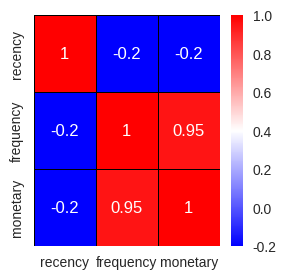

In [50]:
plt.figure(figsize=(3, 3))
correlation_matrix = df_rfm.corr(numeric_only=True).round(2)
sns.heatmap(data = correlation_matrix, annot=True, cmap='bwr', linecolor='black', linewidths=0.5)

In [51]:
df_rfm.describe()

,recency,frequency,monetary
count,1468.000000,1468.000000,1468.000000
mean,145.292234,36.051771,3349.221553
std,101.936959,50.885680,5305.143443
min,1.000000,1.000000,6.900000
25%,56.000000,10.000000,716.802500
50%,132.000000,21.000000,1833.725000
75%,221.000000,46.000000,4099.377500
max,365.000000,695.000000,78655.490000


### 점수별 분포도 확인
- recency는 다양하다고 볼수 있으나 frequency, monetary는 다소 작은 값들로 치중되어 있는 것을 확인
- scale 처리 필요

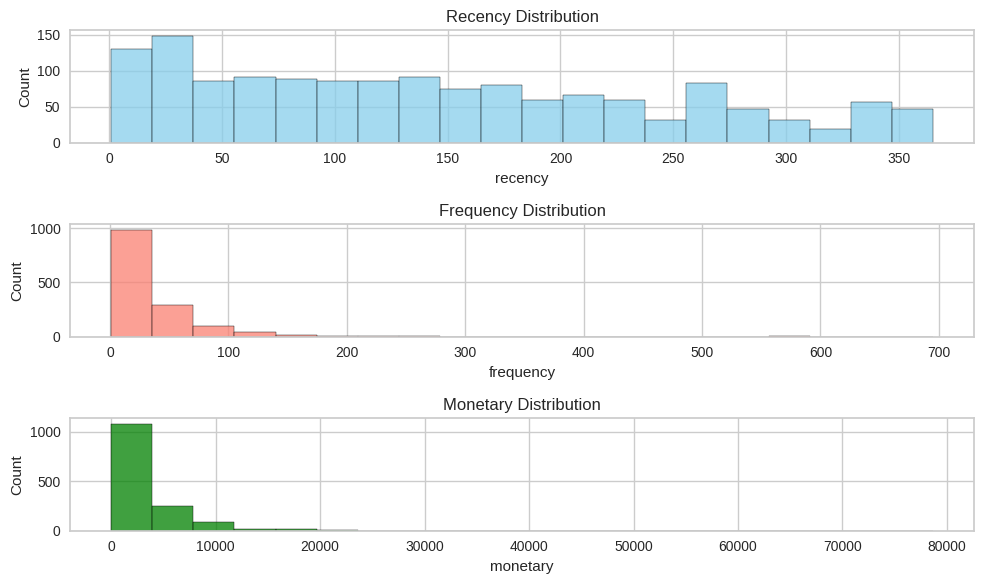

In [52]:
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
sns.histplot(data=df_rfm, x='recency', bins=20, color='skyblue')
plt.title('Recency Distribution')

plt.subplot(3, 1, 2)
sns.histplot(data=df_rfm, x='frequency', bins=20, color='salmon')
plt.title('Frequency Distribution')

plt.subplot(3, 1, 3)
sns.histplot(data=df_rfm, x='monetary', bins=20,color='green')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

### scaling
- 2차원 배열로 변환
- StandardScaler, RobustScaler, logsacle 비교

### StandardScaler

In [53]:
df_rfm_ss = df_rfm.copy()
ss = StandardScaler()

In [54]:
for column in df_rfm_ss.columns[1:]:
    # 2차원 배열로 변환
    column_data = df_rfm_ss[column].values.reshape(-1, 1)
    # StandardScaler를 사용하여 스케일링
    scaled_data = ss.fit_transform(column_data)
    # 스케일링된 결과를 다시 해당 열에 할당
    df_rfm_ss[column] = scaled_data

In [55]:
df_rfm_ss

,고객ID,recency,frequency,monetary
0,USER_0000,-0.365961,-0.669410,-0.599157
1,USER_0001,-0.837001,0.470788,1.955235
2,USER_0002,-0.699614,-0.256579,-0.347076
3,USER_0003,-1.249160,-0.374531,-0.379665
4,USER_0004,-0.365961,-0.001018,-0.278318
...,...,...,...,...
1463,USER_1463,1.233611,-0.571117,-0.478518
1464,USER_1464,-0.562227,0.077617,-0.110131
1465,USER_1465,0.487799,-0.551458,-0.603341
1466,USER_1466,-0.738867,-0.689068,-0.574209


### RobustScaler

In [56]:
df_rfm_rs = df_rfm.copy()
rs = RobustScaler()

In [57]:
for column in df_rfm_rs.columns[1:]:
    # 2차원 배열로 변환
    column_data = df_rfm_rs[column].values.reshape(-1, 1)
    # StandardScaler를 사용하여 스케일링
    scaled_data = rs.fit_transform(column_data)
    # 스케일링된 결과를 다시 해당 열에 할당
    df_rfm_rs[column] = scaled_data

In [58]:
df_rfm_rs

,고객ID,recency,frequency,monetary
0,USER_0000,-0.145455,-0.527778,-0.491352
1,USER_0001,-0.436364,1.083333,3.513526
2,USER_0002,-0.351515,0.055556,-0.096129
3,USER_0003,-0.690909,-0.111111,-0.147224
4,USER_0004,-0.145455,0.416667,0.011673
...,...,...,...,...
1463,USER_1463,0.842424,-0.388889,-0.302209
1464,USER_1464,-0.266667,0.527778,0.275363
1465,USER_1465,0.381818,-0.361111,-0.497912
1466,USER_1466,-0.375758,-0.555556,-0.452237


### logscale

In [59]:
df_rfm_log = df_rfm.copy()

In [60]:
for column in df_rfm_log.columns[1:]:
    # 2차원 배열로 변환
    column_data = df_rfm_log[column].values.reshape(-1, 1)
    # StandardScaler를 사용하여 스케일링
    scaled_data = np.log1p(column_data)
    # 스케일링된 결과를 다시 해당 열에 할당
    df_rfm_log[column] = scaled_data

In [61]:
df_rfm_log

,고객ID,recency,frequency,monetary
0,USER_0000,4.691348,1.098612,5.151498
1,USER_0001,4.110874,4.110874,9.526573
2,USER_0002,4.317488,3.178054,7.319573
3,USER_0003,2.944439,2.890372,7.197982
4,USER_0004,4.691348,3.610918,7.535943
...,...,...,...,...
1463,USER_1463,5.605802,2.079442,6.700091
1464,USER_1464,4.488636,3.713572,7.925215
1465,USER_1465,5.278115,2.197225,5.013963
1466,USER_1466,4.262680,0.693147,5.720312


### scale별 컬럼 데이터 분포도 재확인
- logscale이 아웃라이어 및 데이터들을 가장 잘 반영하여 분포되어 있는 것을 확인

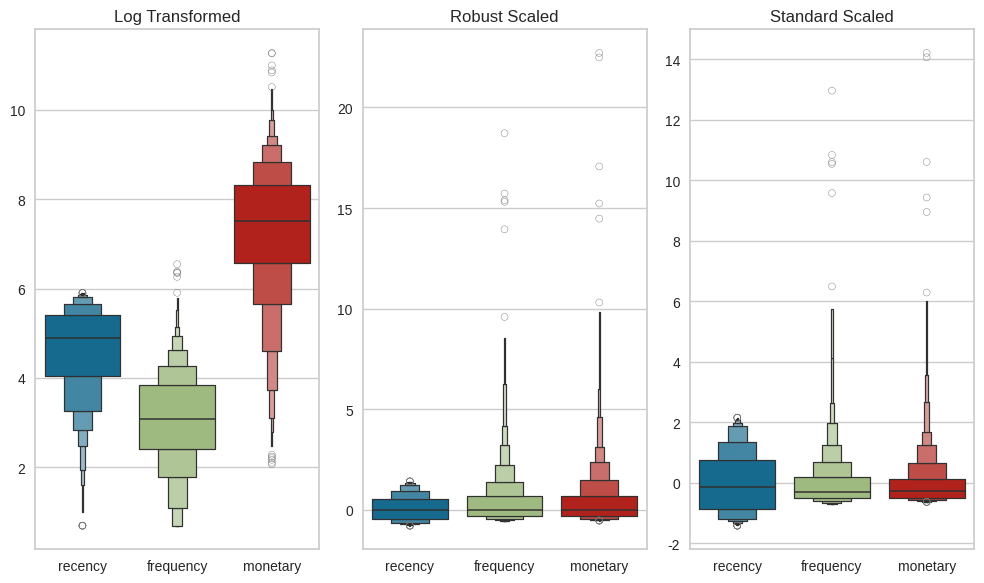

In [62]:
# df_rfm_log의 분포 확인
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
sns.boxenplot(data=df_rfm_log)
plt.title('Log Transformed')

# df_rfm_rs의 분포 확인
plt.subplot(1, 3, 2)
sns.boxenplot(data=df_rfm_rs)
plt.title('Robust Scaled')

# df_rfm_ss의 분포 확인
plt.subplot(1, 3, 3)
sns.boxenplot(data=df_rfm_ss)
plt.title('Standard Scaled')

plt.tight_layout()
plt.show()

In [63]:
df_rfm_log.to_csv("/content/drive/MyDrive/제로베이스/파이널 프로젝트/data/df_rfm_logscale.csv", encoding="utf-8")

## K-means 클러스터링
#### 각 데이터와 중심점 간의 거리에 따른 클러스터링
- 초기 군집의 개수 정하기
- K-means++ 기법에 따른 초기 중심점 설정
- 데이터를 군집에 할당(배정)-> 거리 상 가장 가까운 군집(중심점)으로 각 데이터를 할당 또는 배정
- 모든 데이터의 군집 배정이 끝나면 각 군집에 속하는 데이터들의 평균으로 중심점 재설정
- 중심점의 이동이 없을 때까지 상기의 단계 반복
    - https://velog.io/@jhlee508/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-K-%ED%8F%89%EA%B7%A0K-Means-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98 참고

### RFM에 따른 클러스터링_recency, frequency 2가지 적용

In [64]:
df_2_rf = df_rfm_log.copy()
del df_2_rf['monetary']
df_2_rf.head()

,고객ID,recency,frequency
0,USER_0000,4.691348,1.098612
1,USER_0001,4.110874,4.110874
2,USER_0002,4.317488,3.178054
3,USER_0003,2.944439,2.890372
4,USER_0004,4.691348,3.610918


### KElbowVisualizer 이용한 클러스터 수 계산
- 6개가 최적으로 계산

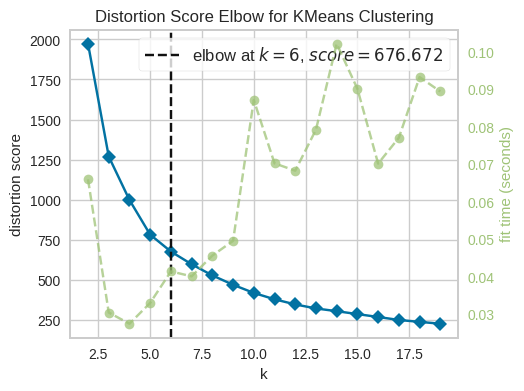

In [65]:
plt.figure(figsize=(5,4))
kmeans = KMeans(random_state=13, n_init=10)
elbow = KElbowVisualizer(kmeans,k=(2,20))
elbow.fit(df_2_rf[['recency', 'frequency']].values)
elbow.show()
plt.show()

### 엘보우 메서드(Elbow Method)를 이용한 클러스터 수 계산
- 2개일 때 sse의 변화율이 급격하게 낮아진 것으로 계산

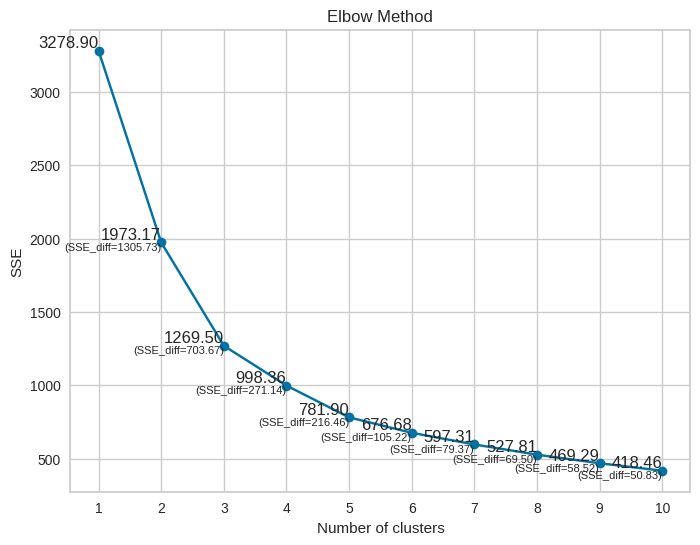

In [66]:
# KMeans 모델 학습에 사용할 특성
X = df_2_rf[['recency', 'frequency']]

# SSE 값을 저장할 리스트
sse = []

# 클러스터 수(k)를 변경(1~10)하면서 KMeans 모델을 학습하고 SSE 값을 계산하여 리스트에 저장
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=13, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # inertia_ 속성은 SSE 값을 반환함

# SSE 값의 변화를 시각화하여 최적의 클러스터 수를 결정
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.xticks(range(1, 11))
plt.grid(True)

# 각 데이터 포인트에 SSE 값을 숫자로 표현하는 주석 추가
for i, sse_value in enumerate(sse):
    plt.text(i + 1, sse_value, f'{sse_value:.2f}', ha='right', va='bottom')
for i in range(1, len(sse)):
    difference = sse[i - 1] - sse[i]
    plt.text(i + 1, sse[i], f'(SSE_diff={difference:.2f})', ha='right',
             va='top', fontsize = 8)

plt.show()

### silhouette_score을 이용한 클러스터 수 계산
- 3개 일때의 silhouette_score가 가장 높은 것으로 계산

Optimal number of clusters (Silhouette Score): 3


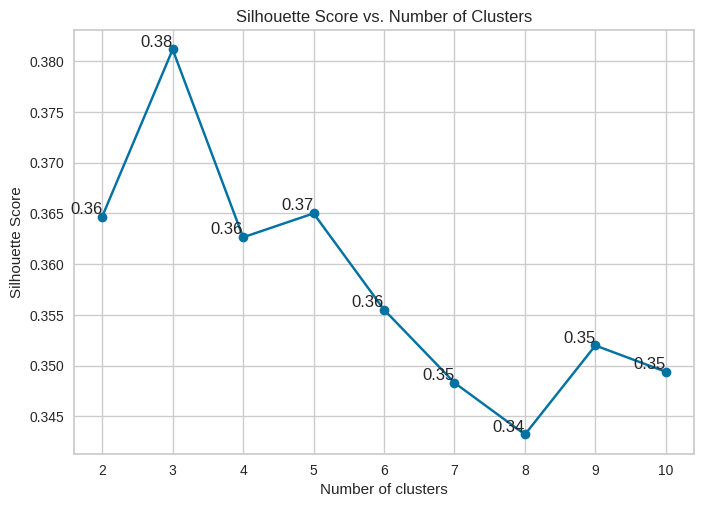

In [67]:
# KMeans 모델 학습에 사용할 특성
X = df_2_rf[['recency', 'frequency']]

# 클러스터 수(k)를 변경하면서 KMeans 모델을 학습하고 실루엣 스코어를 계산하여 리스트에 저장
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=13, n_init=10)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# 실루엣 스코어가 최대가 되는 클러스터 수를 선택
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # 최대값의 인덱스 + 2 (클러스터 수는 2부터 시작)
print("Optimal number of clusters (Silhouette Score):", optimal_k)

# 클러스터 개수에 따른 실루엣 스코어 시각화
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')

# 각 데이터 포인트에 실루엣 스코어 값을 숫자로 표현하는 주석 추가
for k, score in zip(range(2, 11), silhouette_scores):
    plt.text(k, score, f'{score:.2f}', ha='right', va='bottom')

plt.show()

### RFM에 따른 클러스터링_2가지 시각화 적용
- recency, frequency, 2가지를 이용하여 클러스트 3개, 6개로 클러스터링

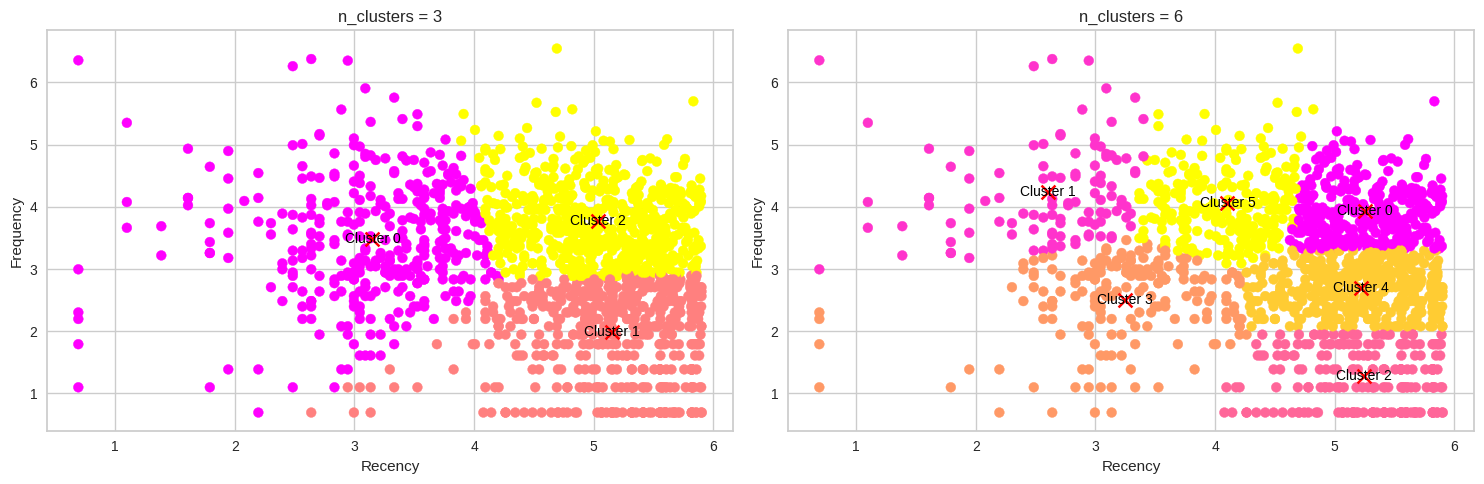

In [68]:
# 2개 특성 선택
X = df_2_rf[['recency', 'frequency']]

# K-Means 클러스터링
n_clusters_list = [3, 6]

# 시각화를 위한 subplot 설정
fig, axes = plt.subplots(1, len(n_clusters_list), figsize=(15, 5))

# 각 클러스터 수에 대해 K-Means 수행 및 시각화
for idx, n_clusters in enumerate(n_clusters_list):
    kmeans = KMeans(n_clusters=n_clusters, random_state=13, n_init=10)
    kmeans.fit(X)
    df_2_rf[f'Cluster_{n_clusters}'] = kmeans.labels_

    # 산점도 그리기
    scatter = axes[idx].scatter(df_2_rf['recency'], df_2_rf['frequency'], c=df_2_rf[f'Cluster_{n_clusters}'], cmap='spring', s=50)
    axes[idx].set_title(f'n_clusters = {n_clusters}')
    axes[idx].set_xlabel('Recency')
    axes[idx].set_ylabel('Frequency')

    # 각 클러스터의 중심점 표시 및 클러스터 레이블 표시
    cluster_centers = kmeans.cluster_centers_
    for i, center in enumerate(cluster_centers):
        axes[idx].scatter(center[0], center[1], marker='x', color='red', s=100)  # 중심점은 빨간색 x로 표시
        axes[idx].text(center[0], center[1], f'Cluster {i}', fontsize=10, color='black', ha='center', va='center')

plt.tight_layout()
plt.show()

## DBSCAN 클러스터링
#### 포인트들 사이의 밀집도를 기반으로 클러스터를 형성하는 방법
- 주어진 반경(eps, 이웃을 정의 하는거리) 내에 최소한의 데이터 포인트(minPts, 핵심 포인트를 정의하는 최소 이웃 수)가 존재하는 경우,
- 해당 데이터 포인트를 핵심 포인트로 간주
- 핵심 포인트를 중심으로 연결되는 데이터 포인트들을 하나의 클러스터로 구분(밀도가 충분히 높은 영역을 클러스터로 식별)
- https://choco-life.tistory.com/45 참고

### RFM에 따른 클러스터링_recency, frequency 2가지 적용

In [69]:
df_DBSCAN_2_rf = df_rfm_log.copy()
del df_DBSCAN_2_rf['monetary']
df_DBSCAN_2_rf

,고객ID,recency,frequency
0,USER_0000,4.691348,1.098612
1,USER_0001,4.110874,4.110874
2,USER_0002,4.317488,3.178054
3,USER_0003,2.944439,2.890372
4,USER_0004,4.691348,3.610918
...,...,...,...
1463,USER_1463,5.605802,2.079442
1464,USER_1464,4.488636,3.713572
1465,USER_1465,5.278115,2.197225
1466,USER_1466,4.262680,0.693147


### eps 구하기
- 여기선 그래프상 0.255 추정

In [70]:
# K-distance Plot 그리는 함수
def plot_k_distance(X, k):
    # NearestNeighbors를 사용하여 k개의 이웃과의 거리 계산
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(X)
    distances, _ = knn.kneighbors(X)

    # k-distance를 계산하여 정렬
    k_distances = np.sort(distances[:, -1])

    # K-distance Plot 그리기
    plt.plot(range(1, len(k_distances) + 1), k_distances)
    plt.xlabel('Points sorted by distance')
    plt.ylabel('Distance to k-th Nearest Neighbor')
    plt.title('K-Distance Plot for DBSCAN')
    plt.show()

    return k_distances

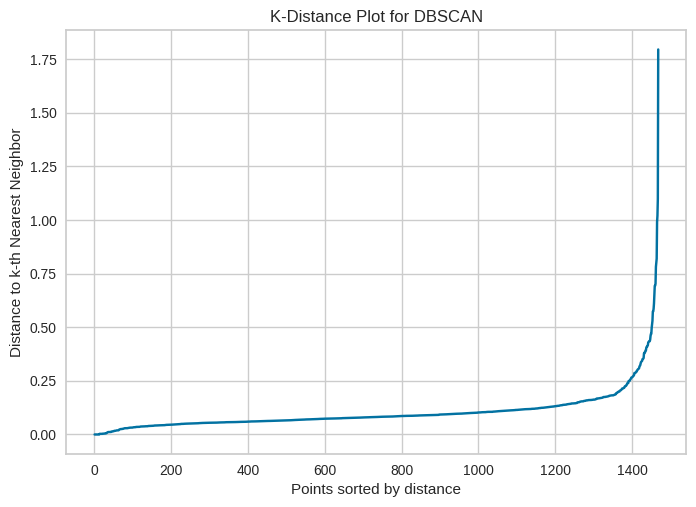

In [71]:
# 특성 선택
X = df_DBSCAN_2_rf[['recency', 'frequency']]

# 이웃의 수 k 설정
k = 4 # min_samples = 2 * dim(차원)

# K-distance Plot 그리기 및 결과 반환
k_distances = plot_k_distance(X, k)

### 'recency', 'frequency' 2가지를 이용한 클러스터링 시각화

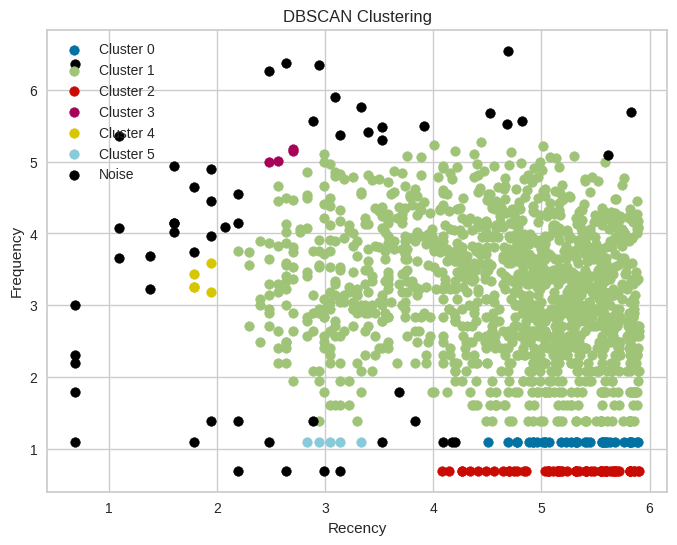

In [72]:
X = df_DBSCAN_2_rf[['recency', 'frequency']]

min_samples = 4 # min_samples = 2 * dim(차원)
eps = 0.255

# DBSCAN 모델 생성
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# 클러스터링 수행
labels = dbscan.fit_predict(X)

# 클러스터링 결과를 데이터프레임에 추가
df_DBSCAN_2_rf['labels'] = labels

# 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))

# 각 클러스터를 다른 색으로 표시
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:
        # 잡음 포인트는 검정색으로 표시
        plt.scatter(X[labels == label]['recency'], X[labels == label]['frequency'], c='black', marker='o', label='Noise')
    else:
        plt.scatter(X[labels == label]['recency'], X[labels == label]['frequency'], marker='o', label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

- K-means 클러스터링과 DBSCAN 클러스터링 구현 결과 : K-means 클러스터링이 좀 더 구분을 잘하는 것으로 보인다

### 다시 k-means 클러스터링

In [73]:
df_2_rf

,고객ID,recency,frequency,Cluster_3,Cluster_6
0,USER_0000,4.691348,1.098612,1,2
1,USER_0001,4.110874,4.110874,2,5
2,USER_0002,4.317488,3.178054,2,5
3,USER_0003,2.944439,2.890372,0,3
4,USER_0004,4.691348,3.610918,2,0
...,...,...,...,...,...
1463,USER_1463,5.605802,2.079442,1,4
1464,USER_1464,4.488636,3.713572,2,5
1465,USER_1465,5.278115,2.197225,1,4
1466,USER_1466,4.262680,0.693147,1,2


In [74]:
# df_rfm에 Cluster 추가
df_rfm['Cluster_6'] = df_2_rf['Cluster_6']
df_rfm

,고객ID,recency,frequency,monetary,Cluster_6
0,USER_0000,108,2,171.69,2
1,USER_0001,60,60,13718.49,5
2,USER_0002,74,23,1508.56,5
3,USER_0003,18,17,1335.73,3
4,USER_0004,108,36,1873.21,0
...,...,...,...,...,...
1463,USER_1463,271,7,811.48,4
1464,USER_1464,88,40,2765.16,5
1465,USER_1465,195,8,149.50,4
1466,USER_1466,70,1,304.00,2


- RF 평균과 중앙값 및 M 합계

In [75]:
df_cluster_mean = df_rfm.groupby('Cluster_6').agg({'recency': 'mean', 'frequency': 'mean', 'monetary' : 'sum'}).reset_index()
df_cluster_median = df_rfm.groupby('Cluster_6').agg({'recency': 'median', 'frequency': 'median'}).reset_index()


In [76]:
df_cluster_mean.rename(columns={'recency' : 'r_mean', 'frequency' : 'f_mean', 'monetary' : 'm_sum'}, inplace=True)
df_cluster_mean

,Cluster_6,r_mean,f_mean,m_sum
0,0,203.478261,56.264214,1416073.85
1,1,14.660377,96.641509,1041347.33
2,2,207.452830,2.971698,54294.56
3,3,29.472826,13.288043,252908.97
4,4,201.200466,14.659674,532291.76
5,5,63.768908,69.298319,1619740.77


In [77]:
df_cluster_median.rename(columns={'recency' : 'r_median', 'frequency' : 'f_median', 'monetary' : 'm_median'}, inplace=True)
df_cluster_median

,Cluster_6,r_median,f_median
0,0,187.0,48.0
1,1,14.0,57.5
2,2,203.0,3.0
3,3,26.0,13.0
4,4,194.0,14.0
5,5,61.5,52.0


In [78]:
df_cluster_mean.set_index('Cluster_6', inplace=True)
df_cluster_mean['r_median'] = df_cluster_median['r_median']
df_cluster_mean['f_median'] = df_cluster_median['f_median']
df_cluster_mean['r_mean'] = round(df_cluster_mean['r_mean'], 2)
df_cluster_mean['f_mean'] = round(df_cluster_mean['f_mean'], 2)
df_cluster_mean

,r_mean,f_mean,m_sum,r_median,f_median
Cluster_6,,,,,
0,203.48,56.26,1416073.85,187.0,48.0
1,14.66,96.64,1041347.33,14.0,57.5
2,207.45,2.97,54294.56,203.0,3.0
3,29.47,13.29,252908.97,26.0,13.0
4,201.20,14.66,532291.76,194.0,14.0
5,63.77,69.30,1619740.77,61.5,52.0


In [79]:
df_cluster = df_cluster_mean.copy()
df_cluster

,r_mean,f_mean,m_sum,r_median,f_median
Cluster_6,,,,,
0,203.48,56.26,1416073.85,187.0,48.0
1,14.66,96.64,1041347.33,14.0,57.5
2,207.45,2.97,54294.56,203.0,3.0
3,29.47,13.29,252908.97,26.0,13.0
4,201.20,14.66,532291.76,194.0,14.0
5,63.77,69.30,1619740.77,61.5,52.0


In [80]:
# 판다스 피벗 테이블에서 각 monetary의 총합 구하기
total_monetary = df_rfm['monetary'].sum()

# 각 클러스터의 monetary 값을 합산하여 데이터프레임 생성
monetary_cluster_sum = df_rfm.groupby('Cluster_6')['monetary'].sum()

# 각 클러스터의 monetary 값에 대한 전체 합의 비율 계산
df_cluster['monetary_ratio'] = round((monetary_cluster_sum / total_monetary) * 100, 2)

# 각 클러스터별 데이터 갯수
cluster_counts = df_rfm['Cluster_6'].value_counts()
df_cluster['customer'] = cluster_counts

# 각 클러스터의 고객 수에 대한 전체 고객 수의 비율 계산
total_customers = cluster_counts.sum()
df_cluster['customer_ratio'] = round((cluster_counts / total_customers) * 100, 2)

# 클러스터별 1인당 평균 최종결제금액
df_cluster['cs_monetary_mean'] = round(df_cluster['m_sum'] / df_cluster['customer'], 2)

df_cluster

,r_mean,f_mean,m_sum,r_median,f_median,monetary_ratio,customer,customer_ratio,cs_monetary_mean
Cluster_6,,,,,,,,,
0,203.48,56.26,1416073.85,187.0,48.0,28.80,299,20.37,4736.03
1,14.66,96.64,1041347.33,14.0,57.5,21.18,106,7.22,9824.03
2,207.45,2.97,54294.56,203.0,3.0,1.10,212,14.44,256.11
3,29.47,13.29,252908.97,26.0,13.0,5.14,184,12.53,1374.51
4,201.20,14.66,532291.76,194.0,14.0,10.83,429,29.22,1240.77
5,63.77,69.30,1619740.77,61.5,52.0,32.94,238,16.21,6805.63


In [81]:
df_cluster.sort_values(by = ['f_mean', 'monetary_ratio', 'cs_monetary_mean'], ascending=False)

,r_mean,f_mean,m_sum,r_median,f_median,monetary_ratio,customer,customer_ratio,cs_monetary_mean
Cluster_6,,,,,,,,,
1,14.66,96.64,1041347.33,14.0,57.5,21.18,106,7.22,9824.03
5,63.77,69.30,1619740.77,61.5,52.0,32.94,238,16.21,6805.63
0,203.48,56.26,1416073.85,187.0,48.0,28.80,299,20.37,4736.03
4,201.20,14.66,532291.76,194.0,14.0,10.83,429,29.22,1240.77
3,29.47,13.29,252908.97,26.0,13.0,5.14,184,12.53,1374.51
2,207.45,2.97,54294.56,203.0,3.0,1.10,212,14.44,256.11


In [82]:
# 새로운 컬럼 순서 정의
new_column_order = ['r_mean', 'r_median', 'f_mean', 'f_median', 'm_sum', 'monetary_ratio', 'customer', 'customer_ratio', 'cs_monetary_mean']

# 새로운 컬럼 순서로 데이터프레임 재구성
df_cluster = df_cluster.reindex(columns=new_column_order)
df_cluster.sort_values(by=['f_mean', 'm_sum', 'cs_monetary_mean'], ascending=False)

,r_mean,r_median,f_mean,f_median,m_sum,monetary_ratio,customer,customer_ratio,cs_monetary_mean
Cluster_6,,,,,,,,,
1,14.66,14.0,96.64,57.5,1041347.33,21.18,106,7.22,9824.03
5,63.77,61.5,69.30,52.0,1619740.77,32.94,238,16.21,6805.63
0,203.48,187.0,56.26,48.0,1416073.85,28.80,299,20.37,4736.03
4,201.20,194.0,14.66,14.0,532291.76,10.83,429,29.22,1240.77
3,29.47,26.0,13.29,13.0,252908.97,5.14,184,12.53,1374.51
2,207.45,203.0,2.97,3.0,54294.56,1.10,212,14.44,256.11


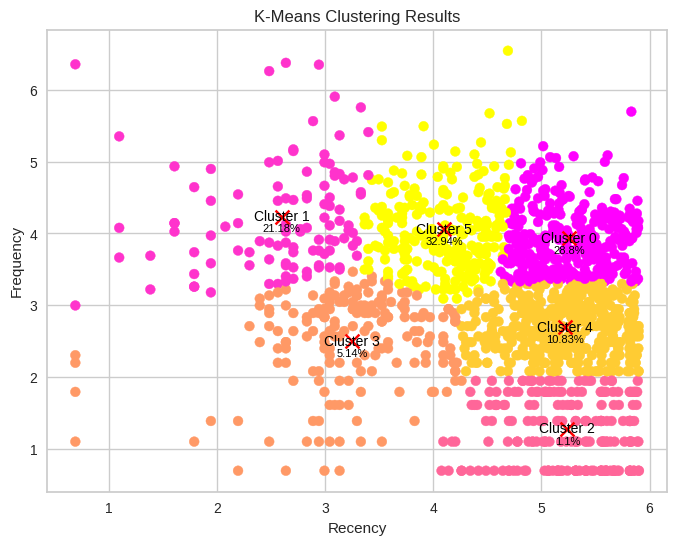

In [83]:
# 2개 특성 선택
X = df_2_rf[['recency', 'frequency']]

# K-Means 클러스터링
kmeans = KMeans(n_clusters=6, random_state=13, n_init=10)
kmeans.fit(X)
df_2_rf['cluster'] = kmeans.labels_

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(df_2_rf['recency'], df_2_rf['frequency'], c=df_2_rf['cluster'], cmap='spring', s=50)
plt.title('K-Means Clustering Results')
plt.xlabel('Recency')
plt.ylabel('Frequency')

# 클러스터 중심점 표시 및 클러스터 레이블 표시
for i, center in enumerate(kmeans.cluster_centers_):
    plt.scatter(center[0], center[1], marker='x', color='red', s=100)  # 중심점은 빨간색 x로 표시
    plt.text(center[0], center[1], f'Cluster {i}', fontsize=10, color='black', ha='center', va='center')

    # 클러스터별 monetary_ratio 값 표시
    plt.text(center[0], center[1] - 0.1, f'{df_cluster["monetary_ratio"][i]}%', fontsize=8, color='black', ha='center', va='top')

plt.show()

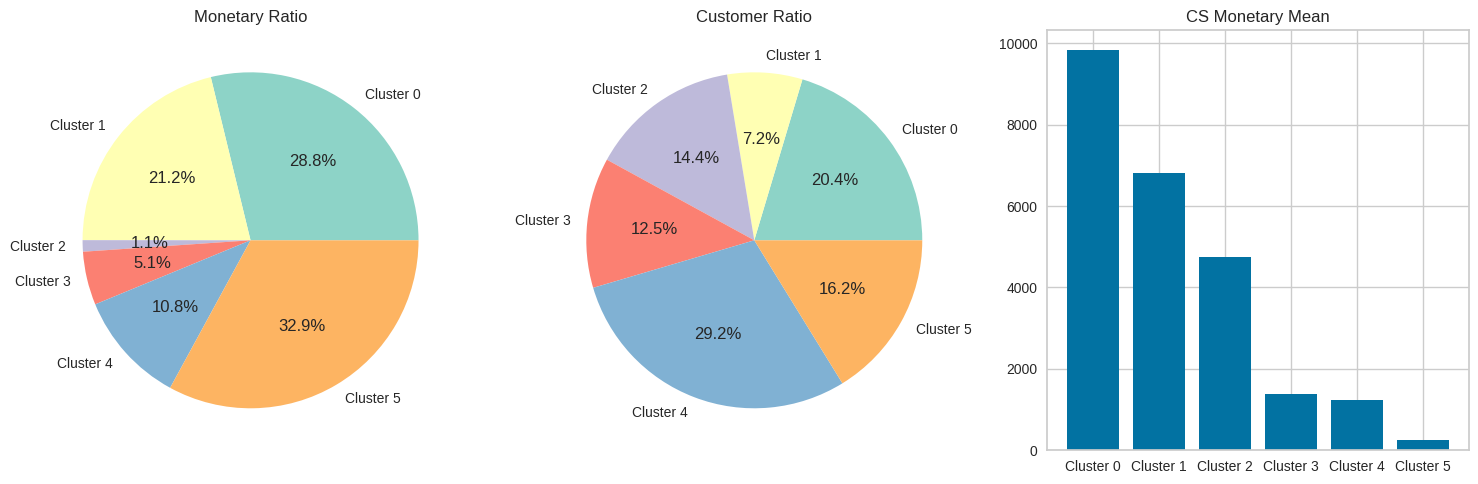

In [84]:
# 피벗테이블에서 각 클러스터별 monetary_ratio, customer_ratio, cs_monetary_mean 추출
monetary_ratio_values = df_cluster['monetary_ratio']
customer_ratio_values = df_cluster['customer_ratio']
cs_monetary_mean_values = df_cluster['cs_monetary_mean']

# 색상 팔레트 지정
colors = plt.cm.Set3.colors[:len(df_cluster)]

# 파이차트 그리기
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

new_cluster_names = [f'Cluster {idx}' for idx in df_cluster.index]

# Monetary Ratio 파이차트
axs[0].pie(monetary_ratio_values, labels=new_cluster_names, autopct='%1.1f%%', colors=colors)
axs[0].set_title('Monetary Ratio')

# Customer Ratio 파이차트
axs[1].pie(customer_ratio_values, labels=new_cluster_names, autopct='%1.1f%%', colors=colors)
axs[1].set_title('Customer Ratio')

# CS Monetary Mean 히스토그램
sorted_cs_monetary_mean_values = cs_monetary_mean_values.sort_values(ascending=False)
axs[2].bar(new_cluster_names, sorted_cs_monetary_mean_values)
axs[2].set_title('CS Monetary Mean')

plt.tight_layout()
plt.show()

### 유력한 후보인 1, 2, 5 클러스터 monetary 비율, customer_ratio, cs_monetary_mean 비율 비교

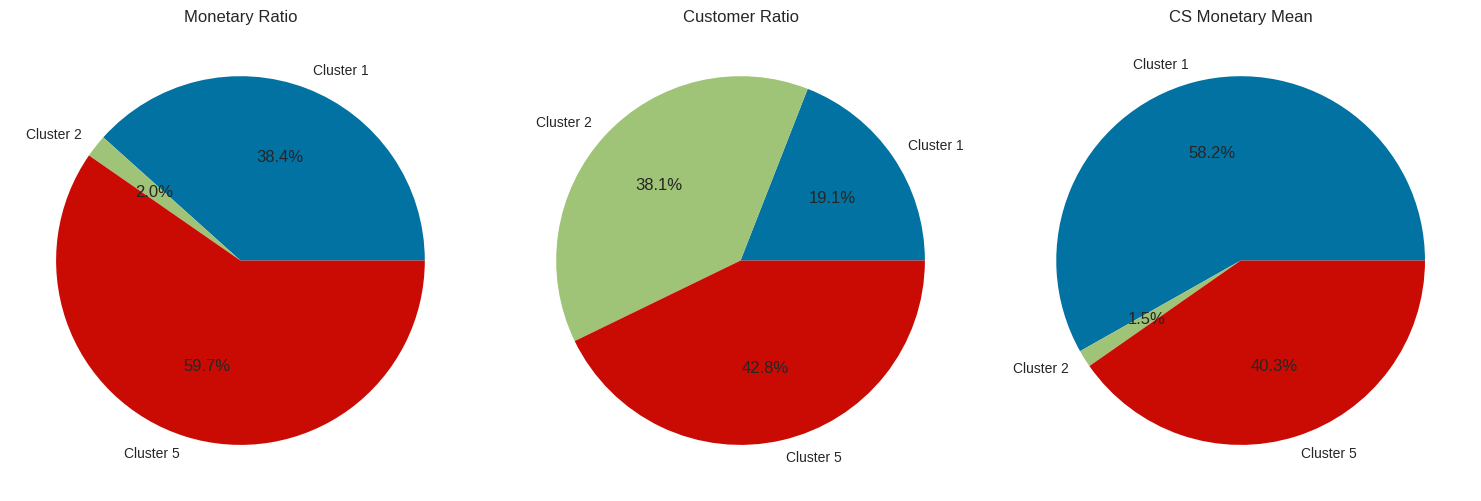

In [85]:
# 클러스터 1, 2와 5의 데이터 추출
# (1, 2, 5의 monetary, customer_ratio, cs_monetary_mean 합계 중 각 클러스터가 차지하는 비율 표현)
cluster_2_5_data = df_cluster.loc[[1, 2, 5], ['monetary_ratio', 'customer_ratio', 'cs_monetary_mean']]

# 파이차트 그리기
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

new_cluster_names = [f'Cluster {idx}' for idx in cluster_2_5_data.index]

# Monetary Ratio 파이차트
axs[0].pie(cluster_2_5_data['monetary_ratio'], labels=new_cluster_names, autopct='%1.1f%%')
axs[0].set_title('Monetary Ratio')

# Customer Ratio 파이차트
axs[1].pie(cluster_2_5_data['customer_ratio'], labels=new_cluster_names, autopct='%1.1f%%')
axs[1].set_title('Customer Ratio')

# CS Monetary Mean 파이차트
axs[2].pie(cluster_2_5_data['cs_monetary_mean'], labels=new_cluster_names, autopct='%1.1f%%')
axs[2].set_title('CS Monetary Mean')

plt.tight_layout()
plt.show()

### vip 클러스터는 1클러스터로 결정
- 클러스터링 시 Recency가 가장 낮게 분포되어있고 Frequency는 높은 비중을 차지
- 고객의 최종결재금액인 monetary의 비율은 세번째로 많으나 각 비율의 차이가 크지 않음
- 클러스터별 고객 분포 비율 대비 1인당 평균 monetary가 가장 높음

In [86]:
df_cluster.sort_values(by=['f_mean', 'm_sum', 'cs_monetary_mean'], ascending=False)

,r_mean,r_median,f_mean,f_median,m_sum,monetary_ratio,customer,customer_ratio,cs_monetary_mean
Cluster_6,,,,,,,,,
1,14.66,14.0,96.64,57.5,1041347.33,21.18,106,7.22,9824.03
5,63.77,61.5,69.30,52.0,1619740.77,32.94,238,16.21,6805.63
0,203.48,187.0,56.26,48.0,1416073.85,28.80,299,20.37,4736.03
4,201.20,194.0,14.66,14.0,532291.76,10.83,429,29.22,1240.77
3,29.47,26.0,13.29,13.0,252908.97,5.14,184,12.53,1374.51
2,207.45,203.0,2.97,3.0,54294.56,1.10,212,14.44,256.11


### 잠재적vip 클러스터는 5로 결정
- 5번 클러스터의 경우 최근성도 낮고 빈도도 3번째로 높다 매출이 가장많은 2번클러스터와 비교했을 때 차이는 5% 정도이다
- 매출 비율 차이는 2와 5의 클러스터 고객 수에 의한 매출 차이
- 실제론 5번 클러스터 고객 비율은 낮고 오히려 1인당 평균 monetary는 조금 높다
- 좀 더 최근까지 기업과 거래하고 1인당 monetary가 2번째로 높은 5번 클러스터를 잠재적 vip로 설정

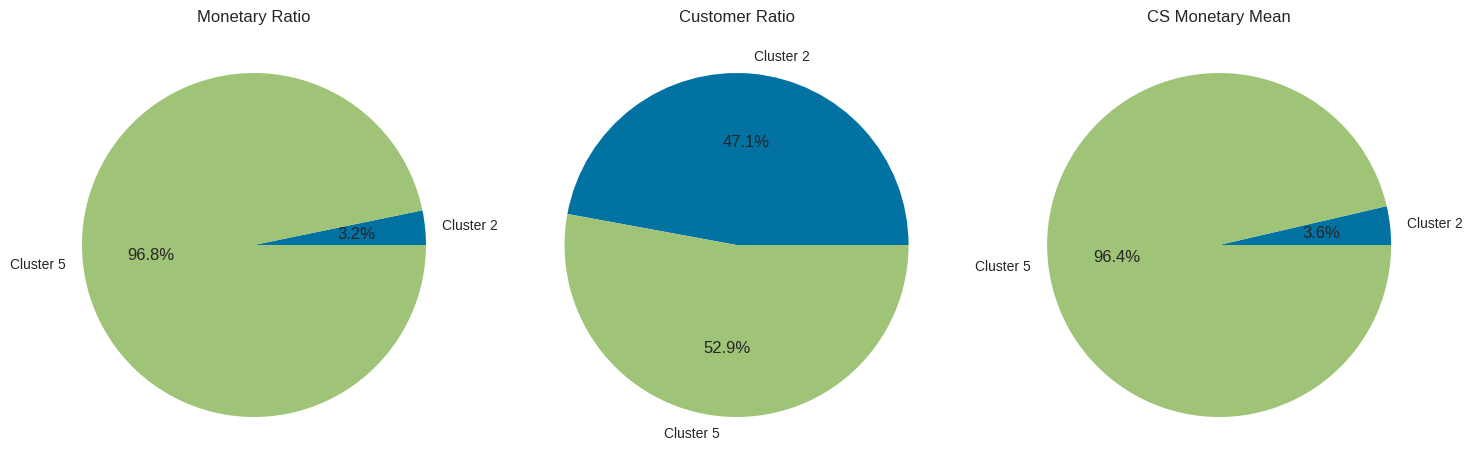

In [87]:
# 클러스터 2, 5의 데이터 추출
# (2, 5의 monetary, customer_ratio, cs_monetary_mean 합계 중 각 클러스터가 차지하는 비율 표현)
cluster_2_5_data = df_cluster.loc[[2, 5], ['monetary_ratio', 'customer_ratio', 'cs_monetary_mean']]

# 파이차트 그리기
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

new_cluster_names = [f'Cluster {idx}' for idx in cluster_2_5_data.index]

# Monetary Ratio 파이차트
axs[0].pie(cluster_2_5_data['monetary_ratio'], labels=new_cluster_names, autopct='%1.1f%%')
axs[0].set_title('Monetary Ratio')

# Customer Ratio 파이차트
axs[1].pie(cluster_2_5_data['customer_ratio'], labels=new_cluster_names, autopct='%1.1f%%')
axs[1].set_title('Customer Ratio')

# CS Monetary Mean 파이차트
axs[2].pie(cluster_2_5_data['cs_monetary_mean'], labels=new_cluster_names, autopct='%1.1f%%')
axs[2].set_title('CS Monetary Mean')

plt.tight_layout()
plt.show()

### lables 및 데이터 셋 만들기

In [88]:
# df_customer, df_rfm 고객ID별 데이터 합치기
df_customer_rfm = pd.merge(df_customer, df_rfm, on=['고객ID'], how='left')
df_customer_rfm

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6
0,USER_1358,남,Chicago,12,340,297,36683.62,0
1,USER_0190,남,California,43,14,44,3069.51,1
2,USER_0066,남,Chicago,33,152,42,3024.89,0
3,USER_0345,여,California,30,365,1,7.74,2
4,USER_0683,남,California,49,124,6,883.78,2
...,...,...,...,...,...,...,...,...
1463,USER_0513,여,New York,41,1,9,500.21,3
1464,USER_0167,여,Chicago,48,1,19,3026.08,1
1465,USER_0845,남,New Jersey,19,1,5,761.86,3
1466,USER_0504,여,New York,45,1,8,1100.75,3


In [89]:
df_onlinesales_raw

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,구매금액,월,GST,쿠폰코드,할인율,최종결제금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71,1,0.10,ELEC10,10.0,144.839
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71,1,0.10,ELEC10,10.0,144.839
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,2.05,1,0.10,OFF10,10.0,8.345
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,87.65,1,0.18,SALE10,10.0,94.150
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,16.50,1,0.18,AIO10,10.0,21.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,121.30,12,0.10,ELEC30,30.0,127.800
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,48.92,12,0.18,SALE30,30.0,40.744
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,151.88,12,0.10,ELEC30,30.0,112.816
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,402.60,12,0.10,ELEC30,30.0,409.100


In [90]:
# 각 고객별 구매빈도가 많은 제품카테고리 및 빈도수가 많은 쿠폰상태 추가
df_category_coupon = df_onlinesales_raw.groupby('고객ID').agg({'제품카테고리': lambda x: x.mode().iloc[0],
                                                              '쿠폰상태': lambda x: x.mode().iloc[0]}).reset_index()
df_category_coupon

,고객ID,제품카테고리,쿠폰상태
0,USER_0000,Apparel,Used
1,USER_0001,Nest-USA,Clicked
2,USER_0002,Office,Clicked
3,USER_0003,Apparel,Clicked
4,USER_0004,Apparel,Clicked
...,...,...,...
1463,USER_1463,Apparel,Used
1464,USER_1464,Apparel,Clicked
1465,USER_1465,Apparel,Clicked
1466,USER_1466,Nest-USA,Not Used


In [91]:
df_customer_rfm = pd.merge(df_customer_rfm, df_category_coupon, on=['고객ID'], how='left')
df_customer_rfm

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6,제품카테고리,쿠폰상태
0,USER_1358,남,Chicago,12,340,297,36683.62,0,Nest-USA,Clicked
1,USER_0190,남,California,43,14,44,3069.51,1,Nest-USA,Clicked
2,USER_0066,남,Chicago,33,152,42,3024.89,0,Apparel,Clicked
3,USER_0345,여,California,30,365,1,7.74,2,Lifestyle,Clicked
4,USER_0683,남,California,49,124,6,883.78,2,Nest-USA,Clicked
...,...,...,...,...,...,...,...,...,...,...
1463,USER_0513,여,New York,41,1,9,500.21,3,Office,Used
1464,USER_0167,여,Chicago,48,1,19,3026.08,1,Nest-USA,Clicked
1465,USER_0845,남,New Jersey,19,1,5,761.86,3,Nest-USA,Clicked
1466,USER_0504,여,New York,45,1,8,1100.75,3,Nest-USA,Clicked


In [92]:
df_customer_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1468 non-null   object 
 1   성별         1468 non-null   object 
 2   고객지역       1468 non-null   object 
 3   가입기간       1468 non-null   int64  
 4   recency    1468 non-null   int64  
 5   frequency  1468 non-null   int64  
 6   monetary   1468 non-null   float64
 7   Cluster_6  1468 non-null   int32  
 8   제품카테고리     1468 non-null   object 
 9   쿠폰상태       1468 non-null   object 
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 109.1+ KB


In [93]:
df_customer_rfm.isnull().sum()

고객ID         0
성별           0
고객지역         0
가입기간         0
recency      0
frequency    0
monetary     0
Cluster_6    0
제품카테고리       0
쿠폰상태         0
dtype: int64

In [94]:
df_customer_rfm['Cluster_6'].unique()

array([0, 1, 2, 5, 4, 3], dtype=int32)

In [95]:
df_vip_rfm = df_customer_rfm[df_customer_rfm['Cluster_6'] == 1].copy()
df_vip_rfm

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6,제품카테고리,쿠폰상태
1,USER_0190,남,California,43,14,44,3069.51,1,Nest-USA,Clicked
8,USER_0736,여,Chicago,40,13,587,77896.38,1,Apparel,Clicked
13,USER_0906,여,Washington DC,40,6,52,5355.34,1,Nest-USA,Clicked
16,USER_1267,여,Chicago,25,22,213,18226.01,1,Apparel,Clicked
37,USER_0334,여,California,44,12,104,6026.55,1,Apparel,Clicked
...,...,...,...,...,...,...,...,...,...,...
1458,USER_0387,남,Chicago,30,5,25,2944.65,1,Nest-USA,Clicked
1459,USER_0451,남,Chicago,19,5,30,3994.34,1,Nest-USA,Used
1461,USER_0315,남,Chicago,35,3,24,2651.70,1,Nest-USA,Clicked
1462,USER_1164,여,New Jersey,38,2,38,4761.21,1,Nest-USA,Clicked


### 전체 고객 중 vip와 잠재적vip 비율
- 전체 고객 수 중 0.35? 생각보다 vip라기에는 너무 많은 비중을 차지한다
- 아무래도 잠재적 vip를 더 줄여야할 것으로 보인다
- vip는 고객생애주기를 통해 잠재적 vip 고객 수 추출

In [96]:
# 전체 데이터의 행 수 구하기
total_rows = len(df_customer_rfm)

# 클러스터 2 또는 5에 속한 데이터의 행 수 구하기
cluster_2_5_rows = len(df_customer_rfm[(df_customer_rfm['Cluster_6'] == 2) | (df_customer_rfm['Cluster_6'] == 5)])

# 비율 계산
ratio = round(cluster_2_5_rows / total_rows, 2)
print("클러스터 2 또는 5에 속한 데이터의 비율:", ratio)

클러스터 2 또는 5에 속한 데이터의 비율: 0.31


### 잠재적vip라고 선정한 1번 클러스터를 세분화_고객별 고객생애가치(CLV)
- 세분화를 통하여 잠재적vip의 수를 줄여보자

### 5번 클러스터에 고객별 고객생애가치(CLV) 점수 부여 후 구분
- 평균 구매 가치(Average Purchase Value, APV): 1년간 소비금액을 1년간 구매 빈도수로 나누어 계산합니다.
    - 공식: APV = 총 소비금액 / 총 구매 빈도수
- 평균 구매 빈도(Average Purchase Frequency, APF): 1년 동안의 구매 빈도수를 계산합니다.
    - 공식: APF = 총 구매 빈도수 / 고객 수
- 고객 가치(Customer Value, CV): 평균 구매 가치와 평균 구매 빈도를 곱하여 계산합니다.
    - 공식: CV = APV x APF
- 고객 수명(Customer Lifespan, CL): 고객이 기업과 거래를 지속하는 평균 기간입니다. 가입기간이나 최근 거래일자를 바탕으로 추정할 수 있습니다.
- 고객 생애 가치(CLV): 고객 가치에 고객 수명을 곱하여 계산합니다.
    - 공식: CLV = CV x CL

In [97]:
df_potential_vip_rfm = df_customer_rfm[df_customer_rfm['Cluster_6'] == 5].copy()
df_potential_vip_rfm

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6,제품카테고리,쿠폰상태
5,USER_0730,남,California,32,79,35,1103.85,5,Apparel,Clicked
6,USER_0585,여,New York,46,33,58,7407.37,5,Nest-USA,Clicked
9,USER_0541,남,California,43,33,199,16610.24,5,Apparel,Clicked
15,USER_0025,여,New Jersey,14,41,44,5630.03,5,Nest-USA,Clicked
20,USER_0281,남,Chicago,30,33,78,8584.99,5,Apparel,Clicked
...,...,...,...,...,...,...,...,...,...,...
1351,USER_0054,여,New York,43,35,31,4300.39,5,Nest-USA,Clicked
1352,USER_0768,남,New York,24,35,28,4728.71,5,Nest-USA,Used
1355,USER_1439,여,Chicago,36,34,42,4256.49,5,Apparel,Clicked
1362,USER_1298,여,New York,30,31,77,5755.94,5,Apparel,Used


In [98]:
# 평균구매가치 : monetary / frequency
df_potential_vip_rfm['평균구매가치'] = df_potential_vip_rfm['monetary'] / df_potential_vip_rfm['frequency']

# 평균구매빈도 : frequency

# 고객가치 : 평균구매가치 X 평균구매빈도
df_potential_vip_rfm['고객가치'] = df_potential_vip_rfm['평균구매가치'] * df_potential_vip_rfm['frequency']

# 고객수명 : recency 점수화
def recency(r):
    if r <= 365 * 0.1:
        return 10
    elif r <= 365 * 0.2:
        return 9
    elif r <= 365 * 0.3:
        return 8
    elif r <= 365 * 0.4:
        return 7
    elif r <= 365 * 0.5:
        return 6
    elif r <= 365 * 0.6:
        return 5
    elif r <= 365 * 0.7:
        return 4
    elif r <= 365 * 0.8:
        return 3
    elif r <= 365 * 0.9:
        return 2
    else:
        return 1

# 개별 값에 대해 반복하기 때문에 map 함수
df_potential_vip_rfm['고객수명'] = df_potential_vip_rfm['recency'].map(lambda x: recency(x))

# 고객생애가치 : 고객가치 X 고객수명
df_potential_vip_rfm['고객생애가치'] = df_potential_vip_rfm['고객가치'] * df_potential_vip_rfm['고객수명']
df_potential_vip_rfm

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6,제품카테고리,쿠폰상태,평균구매가치,고객가치,고객수명,고객생애가치
5,USER_0730,남,California,32,79,35,1103.85,5,Apparel,Clicked,31.538571,1103.85,8,8830.80
6,USER_0585,여,New York,46,33,58,7407.37,5,Nest-USA,Clicked,127.713276,7407.37,10,74073.70
9,USER_0541,남,California,43,33,199,16610.24,5,Apparel,Clicked,83.468543,16610.24,10,166102.40
15,USER_0025,여,New Jersey,14,41,44,5630.03,5,Nest-USA,Clicked,127.955227,5630.03,9,50670.27
20,USER_0281,남,Chicago,30,33,78,8584.99,5,Apparel,Clicked,110.063974,8584.99,10,85849.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,USER_0054,여,New York,43,35,31,4300.39,5,Nest-USA,Clicked,138.722258,4300.39,10,43003.90
1352,USER_0768,남,New York,24,35,28,4728.71,5,Nest-USA,Used,168.882500,4728.71,10,47287.10
1355,USER_1439,여,Chicago,36,34,42,4256.49,5,Apparel,Clicked,101.345000,4256.49,10,42564.90
1362,USER_1298,여,New York,30,31,77,5755.94,5,Apparel,Used,74.752468,5755.94,10,57559.40


### 고객생애가치를 20% 단위로 분류

In [99]:
# 고객생애가치를 비율별로 나누는 함수 정의
def categorize_lifecycle(lifecycle):
    if lifecycle <= np.percentile(df_potential_vip_rfm['고객생애가치'], 20):
        return '5. Very Low'
    elif lifecycle <= np.percentile(df_potential_vip_rfm['고객생애가치'], 40):
        return '4. Low'
    elif lifecycle <= np.percentile(df_potential_vip_rfm['고객생애가치'], 60):
        return '3. Medium'
    elif lifecycle <= np.percentile(df_potential_vip_rfm['고객생애가치'], 80):
        return '2. High'
    else:
        return '1. Very High'

# 새로운 카테고리 변수 생성
df_potential_vip_rfm['고객생애가치_비율'] = df_potential_vip_rfm['고객생애가치'].apply(categorize_lifecycle)

# 결과 확인
print(df_potential_vip_rfm[['고객생애가치', '고객생애가치_비율']].head())

       고객생애가치     고객생애가치_비율
5     8830.80   5. Very Low
6    74073.70       2. High
9   166102.40  1. Very High
15   50670.27     3. Medium
20   85849.90  1. Very High


In [100]:
df_potential_vip_rfm

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6,제품카테고리,쿠폰상태,평균구매가치,고객가치,고객수명,고객생애가치,고객생애가치_비율
5,USER_0730,남,California,32,79,35,1103.85,5,Apparel,Clicked,31.538571,1103.85,8,8830.80,5. Very Low
6,USER_0585,여,New York,46,33,58,7407.37,5,Nest-USA,Clicked,127.713276,7407.37,10,74073.70,2. High
9,USER_0541,남,California,43,33,199,16610.24,5,Apparel,Clicked,83.468543,16610.24,10,166102.40,1. Very High
15,USER_0025,여,New Jersey,14,41,44,5630.03,5,Nest-USA,Clicked,127.955227,5630.03,9,50670.27,3. Medium
20,USER_0281,남,Chicago,30,33,78,8584.99,5,Apparel,Clicked,110.063974,8584.99,10,85849.90,1. Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,USER_0054,여,New York,43,35,31,4300.39,5,Nest-USA,Clicked,138.722258,4300.39,10,43003.90,3. Medium
1352,USER_0768,남,New York,24,35,28,4728.71,5,Nest-USA,Used,168.882500,4728.71,10,47287.10,3. Medium
1355,USER_1439,여,Chicago,36,34,42,4256.49,5,Apparel,Clicked,101.345000,4256.49,10,42564.90,3. Medium
1362,USER_1298,여,New York,30,31,77,5755.94,5,Apparel,Used,74.752468,5755.94,10,57559.40,2. High


### 매출별 각 비율 시각화
### 고객생애가치에 따른 잠재적vip 분류
- 1. Very High, 2. High, 3. Medium : 잠재적vip 확정
- 4. Low, 5. Very Low : 잠재적 vip에서 제외
- 총 고객 1468명 중 20% = 293명
- 금번 EDA를 통하여 vip + 잠재적vip = 110명(1클러스터) + 143명(5클러스터) = 253명

<ipython-input-101-435f6ed90c82>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=monetary_ratio.index, y=monetary_ratio.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLAB

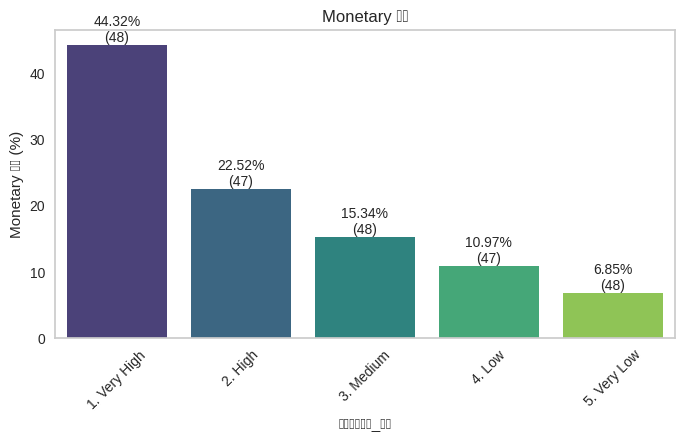

In [101]:
# 고객생애가치_비율컬럼 값에 따라 그룹화된 데이터 생성
grouped_data = df_potential_vip_rfm.groupby('고객생애가치_비율')

# 각 그룹의 데이터 개수 계산
data_count = grouped_data.size()

# 각 그룹의 monetary 값을 합산
monetary_sum = grouped_data['monetary'].sum()

# 합산된 monetary 값을 전체 monetary 합계로 나누어 비율 계산
monetary_ratio = monetary_sum / monetary_sum.sum() * 100

# 비율을 숫자로 표현하고 바의 색상을 다르게하여 시각화
plt.figure(figsize=(8, 4))
barplot = sns.barplot(x=monetary_ratio.index, y=monetary_ratio.values, palette='viridis')
plt.title('Monetary 비율')
plt.xlabel('고객생애가치_비율')
plt.ylabel('Monetary 비율 (%)')

# 각 막대에 숫자 표시
for i, (val, count) in enumerate(zip(monetary_ratio.values, data_count.values)):
    barplot.text(i, val, f'{val:.2f}%\n({count})', horizontalalignment='center', verticalalignment='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [102]:
df_potential_vip_rfm

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6,제품카테고리,쿠폰상태,평균구매가치,고객가치,고객수명,고객생애가치,고객생애가치_비율
5,USER_0730,남,California,32,79,35,1103.85,5,Apparel,Clicked,31.538571,1103.85,8,8830.80,5. Very Low
6,USER_0585,여,New York,46,33,58,7407.37,5,Nest-USA,Clicked,127.713276,7407.37,10,74073.70,2. High
9,USER_0541,남,California,43,33,199,16610.24,5,Apparel,Clicked,83.468543,16610.24,10,166102.40,1. Very High
15,USER_0025,여,New Jersey,14,41,44,5630.03,5,Nest-USA,Clicked,127.955227,5630.03,9,50670.27,3. Medium
20,USER_0281,남,Chicago,30,33,78,8584.99,5,Apparel,Clicked,110.063974,8584.99,10,85849.90,1. Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,USER_0054,여,New York,43,35,31,4300.39,5,Nest-USA,Clicked,138.722258,4300.39,10,43003.90,3. Medium
1352,USER_0768,남,New York,24,35,28,4728.71,5,Nest-USA,Used,168.882500,4728.71,10,47287.10,3. Medium
1355,USER_1439,여,Chicago,36,34,42,4256.49,5,Apparel,Clicked,101.345000,4256.49,10,42564.90,3. Medium
1362,USER_1298,여,New York,30,31,77,5755.94,5,Apparel,Used,74.752468,5755.94,10,57559.40,2. High


In [103]:
df_real_poten_vip_rfm = df_potential_vip_rfm[(df_potential_vip_rfm['고객생애가치_비율'] == '1. Very High')
                                             | (df_potential_vip_rfm['고객생애가치_비율'] == '2. High')
                                             | (df_potential_vip_rfm['고객생애가치_비율'] == '3. Medium')].copy()
df_real_poten_vip_rfm['vip'] = '잠재적vip'
df_real_poten_vip_rfm

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6,제품카테고리,쿠폰상태,평균구매가치,고객가치,고객수명,고객생애가치,고객생애가치_비율,vip
6,USER_0585,여,New York,46,33,58,7407.37,5,Nest-USA,Clicked,127.713276,7407.37,10,74073.70,2. High,잠재적vip
9,USER_0541,남,California,43,33,199,16610.24,5,Apparel,Clicked,83.468543,16610.24,10,166102.40,1. Very High,잠재적vip
15,USER_0025,여,New Jersey,14,41,44,5630.03,5,Nest-USA,Clicked,127.955227,5630.03,9,50670.27,3. Medium,잠재적vip
20,USER_0281,남,Chicago,30,33,78,8584.99,5,Apparel,Clicked,110.063974,8584.99,10,85849.90,1. Very High,잠재적vip
25,USER_0783,여,Chicago,21,54,46,5042.48,5,Apparel,Clicked,109.619130,5042.48,9,45382.32,3. Medium,잠재적vip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,USER_0054,여,New York,43,35,31,4300.39,5,Nest-USA,Clicked,138.722258,4300.39,10,43003.90,3. Medium,잠재적vip
1352,USER_0768,남,New York,24,35,28,4728.71,5,Nest-USA,Used,168.882500,4728.71,10,47287.10,3. Medium,잠재적vip
1355,USER_1439,여,Chicago,36,34,42,4256.49,5,Apparel,Clicked,101.345000,4256.49,10,42564.90,3. Medium,잠재적vip
1362,USER_1298,여,New York,30,31,77,5755.94,5,Apparel,Used,74.752468,5755.94,10,57559.40,2. High,잠재적vip


In [104]:
df_real_poten_vip_rfm

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6,제품카테고리,쿠폰상태,평균구매가치,고객가치,고객수명,고객생애가치,고객생애가치_비율,vip
6,USER_0585,여,New York,46,33,58,7407.37,5,Nest-USA,Clicked,127.713276,7407.37,10,74073.70,2. High,잠재적vip
9,USER_0541,남,California,43,33,199,16610.24,5,Apparel,Clicked,83.468543,16610.24,10,166102.40,1. Very High,잠재적vip
15,USER_0025,여,New Jersey,14,41,44,5630.03,5,Nest-USA,Clicked,127.955227,5630.03,9,50670.27,3. Medium,잠재적vip
20,USER_0281,남,Chicago,30,33,78,8584.99,5,Apparel,Clicked,110.063974,8584.99,10,85849.90,1. Very High,잠재적vip
25,USER_0783,여,Chicago,21,54,46,5042.48,5,Apparel,Clicked,109.619130,5042.48,9,45382.32,3. Medium,잠재적vip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1351,USER_0054,여,New York,43,35,31,4300.39,5,Nest-USA,Clicked,138.722258,4300.39,10,43003.90,3. Medium,잠재적vip
1352,USER_0768,남,New York,24,35,28,4728.71,5,Nest-USA,Used,168.882500,4728.71,10,47287.10,3. Medium,잠재적vip
1355,USER_1439,여,Chicago,36,34,42,4256.49,5,Apparel,Clicked,101.345000,4256.49,10,42564.90,3. Medium,잠재적vip
1362,USER_1298,여,New York,30,31,77,5755.94,5,Apparel,Used,74.752468,5755.94,10,57559.40,2. High,잠재적vip


In [105]:
df_vip_rfm['vip'] = 'vip'
df_vip_rfm

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6,제품카테고리,쿠폰상태,vip
1,USER_0190,남,California,43,14,44,3069.51,1,Nest-USA,Clicked,vip
8,USER_0736,여,Chicago,40,13,587,77896.38,1,Apparel,Clicked,vip
13,USER_0906,여,Washington DC,40,6,52,5355.34,1,Nest-USA,Clicked,vip
16,USER_1267,여,Chicago,25,22,213,18226.01,1,Apparel,Clicked,vip
37,USER_0334,여,California,44,12,104,6026.55,1,Apparel,Clicked,vip
...,...,...,...,...,...,...,...,...,...,...,...
1458,USER_0387,남,Chicago,30,5,25,2944.65,1,Nest-USA,Clicked,vip
1459,USER_0451,남,Chicago,19,5,30,3994.34,1,Nest-USA,Used,vip
1461,USER_0315,남,Chicago,35,3,24,2651.70,1,Nest-USA,Clicked,vip
1462,USER_1164,여,New Jersey,38,2,38,4761.21,1,Nest-USA,Clicked,vip


### 전체 데이터에 고객생애가치 파생변수 만들기 및 최종 vip, 잠재적vip 데이터 합치기

In [106]:
# 평균구매가치 : monetary / frequency
df_customer_rfm['평균구매가치'] = df_customer_rfm['monetary'] / df_customer_rfm['frequency']

# 평균구매빈도 : frequency

# 고객가치 : 평균구매가치 X 평균구매빈도
df_customer_rfm['고객가치'] = df_customer_rfm['평균구매가치'] * df_customer_rfm['frequency']

# 고객수명 : recency 점수화
def recency(r):
    if r <= 365 * 0.1:
        return 10
    elif r <= 365 * 0.2:
        return 9
    elif r <= 365 * 0.3:
        return 8
    elif r <= 365 * 0.4:
        return 7
    elif r <= 365 * 0.5:
        return 6
    elif r <= 365 * 0.6:
        return 5
    elif r <= 365 * 0.7:
        return 4
    elif r <= 365 * 0.8:
        return 3
    elif r <= 365 * 0.9:
        return 2
    else:
        return 1

# 개별 값에 대해 반복하기 때문에 map 함수
df_customer_rfm['고객수명'] = df_customer_rfm['recency'].map(lambda x: recency(x))

# 고객생애가치 : 고객가치 X 고객수명
df_customer_rfm['고객생애가치'] = df_customer_rfm['고객가치'] * df_customer_rfm['고객수명']
df_customer_rfm

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6,제품카테고리,쿠폰상태,평균구매가치,고객가치,고객수명,고객생애가치
0,USER_1358,남,Chicago,12,340,297,36683.62,0,Nest-USA,Clicked,123.513872,36683.62,1,36683.62
1,USER_0190,남,California,43,14,44,3069.51,1,Nest-USA,Clicked,69.761591,3069.51,10,30695.10
2,USER_0066,남,Chicago,33,152,42,3024.89,0,Apparel,Clicked,72.021190,3024.89,6,18149.34
3,USER_0345,여,California,30,365,1,7.74,2,Lifestyle,Clicked,7.740000,7.74,1,7.74
4,USER_0683,남,California,49,124,6,883.78,2,Nest-USA,Clicked,147.296667,883.78,7,6186.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_0513,여,New York,41,1,9,500.21,3,Office,Used,55.578889,500.21,10,5002.10
1464,USER_0167,여,Chicago,48,1,19,3026.08,1,Nest-USA,Clicked,159.267368,3026.08,10,30260.80
1465,USER_0845,남,New Jersey,19,1,5,761.86,3,Nest-USA,Clicked,152.372000,761.86,10,7618.60
1466,USER_0504,여,New York,45,1,8,1100.75,3,Nest-USA,Clicked,137.593750,1100.75,10,11007.50


### vip, 잠재적vip lable 달기

In [107]:
df_customer_vip = df_customer_rfm.copy()
df_customer_vip

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6,제품카테고리,쿠폰상태,평균구매가치,고객가치,고객수명,고객생애가치
0,USER_1358,남,Chicago,12,340,297,36683.62,0,Nest-USA,Clicked,123.513872,36683.62,1,36683.62
1,USER_0190,남,California,43,14,44,3069.51,1,Nest-USA,Clicked,69.761591,3069.51,10,30695.10
2,USER_0066,남,Chicago,33,152,42,3024.89,0,Apparel,Clicked,72.021190,3024.89,6,18149.34
3,USER_0345,여,California,30,365,1,7.74,2,Lifestyle,Clicked,7.740000,7.74,1,7.74
4,USER_0683,남,California,49,124,6,883.78,2,Nest-USA,Clicked,147.296667,883.78,7,6186.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_0513,여,New York,41,1,9,500.21,3,Office,Used,55.578889,500.21,10,5002.10
1464,USER_0167,여,Chicago,48,1,19,3026.08,1,Nest-USA,Clicked,159.267368,3026.08,10,30260.80
1465,USER_0845,남,New Jersey,19,1,5,761.86,3,Nest-USA,Clicked,152.372000,761.86,10,7618.60
1466,USER_0504,여,New York,45,1,8,1100.75,3,Nest-USA,Clicked,137.593750,1100.75,10,11007.50


In [108]:
# df_customer_vip에 'vip' 컬럼을 생성하고 값을 초기화
df_customer_vip['vip'] = None

# df_customer_vip와 df_real_poten_vip_rfm의 '고객ID' 컬럼을 기준으로 'vip' 값을 업데이트
df_customer_vip.loc[df_customer_vip['고객ID'].isin(df_real_poten_vip_rfm['고객ID']), 'vip'] = \
    df_real_poten_vip_rfm[df_real_poten_vip_rfm['고객ID'].isin(df_customer_vip['고객ID'])]['vip']

len(df_customer_vip[df_customer_vip['vip'] == '잠재적vip'])

143

In [109]:
# df_customer_vip와 df_vip_rfm의 '고객ID' 컬럼을 기준으로 'vip' 값을 업데이트
df_customer_vip.loc[df_customer_vip['고객ID'].isin(df_vip_rfm['고객ID']), 'vip'] = \
    df_vip_rfm[df_vip_rfm['고객ID'].isin(df_customer_vip['고객ID'])]['vip']

len(df_customer_vip[df_customer_vip['vip'] == 'vip'])

106

In [110]:
df_customer_vip['vip'].unique()

array([None, 'vip', '잠재적vip'], dtype=object)

In [111]:
# vip, 잠재적vip를 제외한 나머지는 non-vip 설정
df_customer_vip['vip'] = df_customer_vip['vip'].fillna('non-vip')

In [112]:
df_customer_vip['vip'].unique()

array(['non-vip', 'vip', '잠재적vip'], dtype=object)

In [113]:
# k-means 클러스터링을 이용한 cluster 컬럼 머신러닝을 위해 삭제
df_customer_vip.drop(columns=['Cluster_6'], inplace=True)

In [114]:
df_customer_vip.isnull().sum()

고객ID         0
성별           0
고객지역         0
가입기간         0
recency      0
frequency    0
monetary     0
제품카테고리       0
쿠폰상태         0
평균구매가치       0
고객가치         0
고객수명         0
고객생애가치       0
vip          0
dtype: int64

In [115]:
df_customer_vip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1468 non-null   object 
 1   성별         1468 non-null   object 
 2   고객지역       1468 non-null   object 
 3   가입기간       1468 non-null   int64  
 4   recency    1468 non-null   int64  
 5   frequency  1468 non-null   int64  
 6   monetary   1468 non-null   float64
 7   제품카테고리     1468 non-null   object 
 8   쿠폰상태       1468 non-null   object 
 9   평균구매가치     1468 non-null   float64
 10  고객가치       1468 non-null   float64
 11  고객수명       1468 non-null   int64  
 12  고객생애가치     1468 non-null   float64
 13  vip        1468 non-null   object 
dtypes: float64(4), int64(4), object(6)
memory usage: 160.7+ KB


In [116]:
df_customer_vip.to_csv("/content/drive/MyDrive/제로베이스/파이널 프로젝트/data/df_customer_vip.csv", encoding="utf-8")

## RFM에 따른 클러스터별 특성 파악을 위한 EDA (추가)

### 기준1
```
VIP 가설 : 클러스터별 1인당 평균 최종결제금액 기준
````

In [117]:
ch_df_customer_rfm = df_customer_rfm.drop(columns=['제품카테고리', '쿠폰상태', '평균구매가치', '고객가치', '고객수명', '고객생애가치']).copy()
ch_df_customer_rfm

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6
0,USER_1358,남,Chicago,12,340,297,36683.62,0
1,USER_0190,남,California,43,14,44,3069.51,1
2,USER_0066,남,Chicago,33,152,42,3024.89,0
3,USER_0345,여,California,30,365,1,7.74,2
4,USER_0683,남,California,49,124,6,883.78,2
...,...,...,...,...,...,...,...,...
1463,USER_0513,여,New York,41,1,9,500.21,3
1464,USER_0167,여,Chicago,48,1,19,3026.08,1
1465,USER_0845,남,New Jersey,19,1,5,761.86,3
1466,USER_0504,여,New York,45,1,8,1100.75,3


In [118]:
df_rfm

,고객ID,recency,frequency,monetary,Cluster_6
0,USER_0000,108,2,171.69,2
1,USER_0001,60,60,13718.49,5
2,USER_0002,74,23,1508.56,5
3,USER_0003,18,17,1335.73,3
4,USER_0004,108,36,1873.21,0
...,...,...,...,...,...
1463,USER_1463,271,7,811.48,4
1464,USER_1464,88,40,2765.16,5
1465,USER_1465,195,8,149.50,4
1466,USER_1466,70,1,304.00,2


In [119]:
# 각 클러스터별 r, f, m 평균 구하기
df_cluster = df_rfm.pivot_table(index='Cluster_6', values=['recency', 'frequency'], aggfunc='mean')
df_cluster['recency'] = round(df_cluster['recency'], 2)
df_cluster['frequency'] = round(df_cluster['frequency'], 2)
df_cluster = pd.merge(df_cluster, df_rfm.groupby('Cluster_6')['monetary'].sum(), on='Cluster_6')
df_cluster = df_cluster.rename(columns={'recency' : 'r_mean', 'frequency' : 'f_mean', 'monetary' : 'm_sum'})
df_cluster

# 판다스 피벗 테이블에서 각 monetary의 총합 구하기
total_monetary = df_rfm['monetary'].sum()

# 각 클러스터의 monetary 값을 합산하여 데이터프레임 생성
monetary_cluster_sum = df_rfm.groupby('Cluster_6')['monetary'].sum()

# 각 클러스터의 monetary 값에 대한 전체 합의 비율 계산
df_cluster['monetary_ratio'] = round((monetary_cluster_sum / total_monetary) * 100, 2)

# 각 클러스터별 데이터 갯수
cluster_counts = df_rfm['Cluster_6'].value_counts()
df_cluster['customer'] = cluster_counts

# 각 클러스터의 고객 수에 대한 전체 고객 수의 비율 계산
total_customers = cluster_counts.sum()
df_cluster['customer_ratio'] = round((cluster_counts / total_customers) * 100, 2)

# 클러스터별 1인당 평균 최종결제금액
df_cluster['cs_monetary_mean'] = round(df_cluster['m_sum'] / df_cluster['customer'], 2)

# 클러스터별 1인당 중앙결제금액 계산
df_cluster = pd.merge(df_cluster, df_rfm.groupby('Cluster_6')['monetary'].median(), on='Cluster_6')

# df_cluster = pd.merge(df_cluster, df_rfm.groupby('Cluster_6')['m_sum'].median(), on='Cluster_6')

df_cluster = df_cluster.rename(columns={'f_mean':'f_평균',
                                        'r_mean':'r_평균',
                                        'm_sum':'m_합계',
                                        'monetary_ratio':'m_비율',
                                        'customer':'고객수',
                                        'customer_ratio':'고객비율',
                                        'cs_monetary_mean':'일인당평균최종결제금액',
                                        'monetary' : '일인당최종결제금액중앙값'})

# 피벗 테이블 데이터프레임으로 변환 - rest_index 이용
df_cluster.reset_index(inplace=True)

ch_df_cluster = df_cluster
ch_df_cluster

,Cluster_6,f_평균,r_평균,m_합계,m_비율,고객수,고객비율,일인당평균최종결제금액,일인당최종결제금액중앙값
0,0,56.26,203.48,1416073.85,28.80,299,20.37,4736.03,3786.450
1,1,96.64,14.66,1041347.33,21.18,106,7.22,9824.03,6042.405
2,2,2.97,207.45,54294.56,1.10,212,14.44,256.11,144.930
3,3,13.29,29.47,252908.97,5.14,184,12.53,1374.51,1207.905
4,4,14.66,201.20,532291.76,10.83,429,29.22,1240.77,1043.680
5,5,69.30,63.77,1619740.77,32.94,238,16.21,6805.63,5218.160


In [120]:
# 클러스터별 1인당 평균 최종결제금액 높은 순으로 정렬
df_cluster_sort = ch_df_cluster.sort_values(by='일인당평균최종결제금액', ascending=False).reset_index(drop=True)
# df_cluster_sort = df_cluster_sort.style.hide(axis='index')
df_cluster_sort

,Cluster_6,f_평균,r_평균,m_합계,m_비율,고객수,고객비율,일인당평균최종결제금액,일인당최종결제금액중앙값
0,1,96.64,14.66,1041347.33,21.18,106,7.22,9824.03,6042.405
1,5,69.30,63.77,1619740.77,32.94,238,16.21,6805.63,5218.160
2,0,56.26,203.48,1416073.85,28.80,299,20.37,4736.03,3786.450
3,3,13.29,29.47,252908.97,5.14,184,12.53,1374.51,1207.905
4,4,14.66,201.20,532291.76,10.83,429,29.22,1240.77,1043.680
5,2,2.97,207.45,54294.56,1.10,212,14.44,256.11,144.930


<ipython-input-121-962ef70d0791>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_6', y='monetary', data=df_rfm, palette='coolwarm')
<ipython-input-121-962ef70d0791>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_6', y='일인당평균최종결제금액', data=df_cluster, palette='coolwarm')
<ipython-input-121-962ef70d0791>:19: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
<ipython-input-121-962ef70d0791>:19: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  plt.tight_layout()
<ipython-input-121-962ef70d0791>:19: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  plt.tight_lay

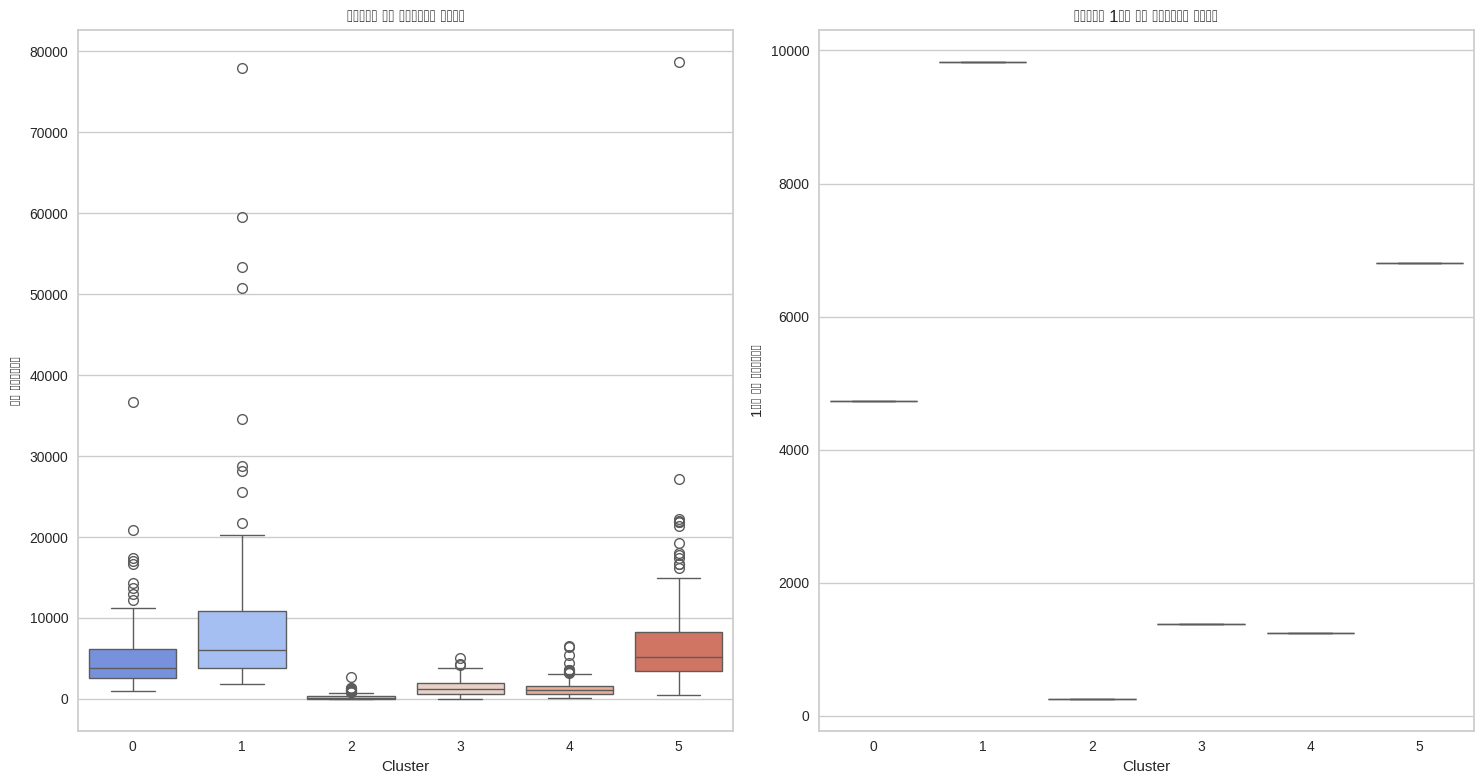

In [121]:
# 그래프 크기 설정
plt.figure(figsize=(15, 8))

# 박스플롯 그래프
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster_6', y='monetary', data=df_rfm, palette='coolwarm')
plt.title('클러스터별 전체 최종결제금액 박스플롯')
plt.xlabel('Cluster')
plt.ylabel('전체 최종결제금액')

# 1인당 평균 최종결제금액 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster_6', y='일인당평균최종결제금액', data=df_cluster, palette='coolwarm')
plt.title('클러스터별 1인당 평균 최종결제금액 박스플롯')
plt.xlabel('Cluster')
plt.ylabel('1인당 평균 최종결제금액')

# 그래프 출력
plt.tight_layout()
plt.show()

<ipython-input-122-f33546218c5d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Cluster_6', y='일인당평균최종결제금액', data=df_cluster, palette='coolwarm')
<ipython-input-122-f33546218c5d>:14: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  plt.tight_layout()
<ipython-input-122-f33546218c5d>:14: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  plt.tight_layout()
<ipython-input-122-f33546218c5d>:14: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-122-f33546218c5d>:14: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.tight_layout()
<ipython-input-122-f33546218c5d>:14: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  plt.tight_layout()
<ipython-

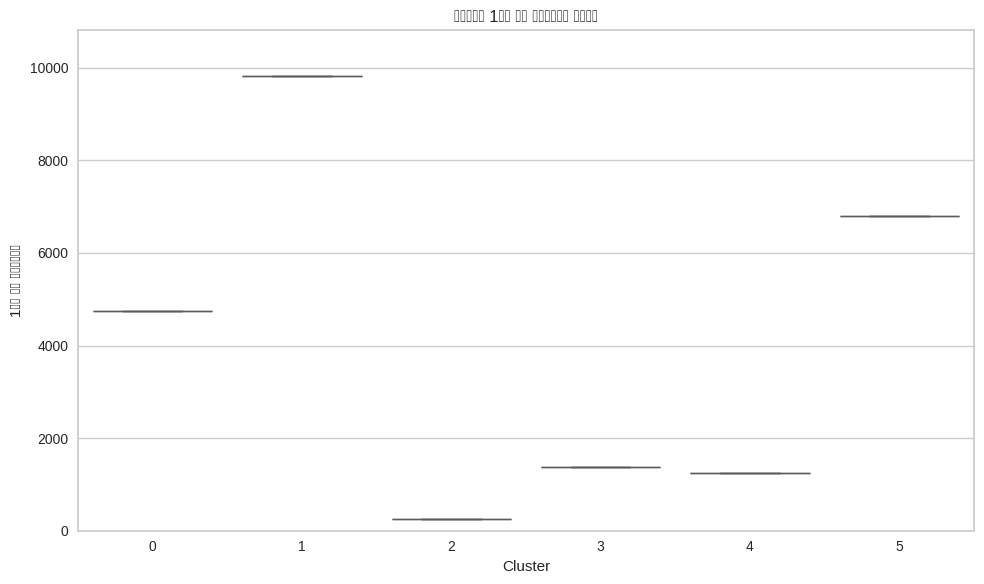

In [122]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 박스플롯 그래프
ax = sns.boxplot(x='Cluster_6', y='일인당평균최종결제금액', data=df_cluster, palette='coolwarm')
plt.title('클러스터별 1인당 평균 최종결제금액 박스플롯')
plt.xlabel('Cluster')
plt.ylabel('1인당 평균 최종결제금액')

# y축 스케일 조정
ax.set_ylim(0, df_cluster['일인당평균최종결제금액'].max() * 1.1)

# 그래프 출력
plt.tight_layout()
plt.show()

##### 피벗 테이블 데이터프레임으로 변환 후 칼럼명 변경

In [124]:
# # 피벗 테이블 데이터프레임으로 변환 - rest_index 이용
# .reset_index(inplace=True)

# # 칼럼명 변경 - 쉽게 한글로 변경함.
# ch_df_cluster.rename(columns = {'f_mean':'f_평균',
#                              'r_mean':'r_평균',
#                              'm_sum':'m_합계',
#                              'monetary_ratio':'m_비율',
#                              'customer':'고객수',
#                              'customer_ratio':'고객비율',
#                              'cs_monetary_mean':'일인당평균최종결제금액'}, inplace=True)

In [125]:
ch_df_cluster.head()

,Cluster_6,f_평균,r_평균,m_합계,m_비율,고객수,고객비율,일인당평균최종결제금액,일인당최종결제금액중앙값
0,0,56.26,203.48,1416073.85,28.80,299,20.37,4736.03,3786.450
1,1,96.64,14.66,1041347.33,21.18,106,7.22,9824.03,6042.405
2,2,2.97,207.45,54294.56,1.10,212,14.44,256.11,144.930
3,3,13.29,29.47,252908.97,5.14,184,12.53,1374.51,1207.905
4,4,14.66,201.20,532291.76,10.83,429,29.22,1240.77,1043.680


In [126]:
# 클러스터별 1인당 평균 최종결제금액 높은 순으로 정렬
df_cluster_sort = ch_df_cluster.sort_values(by='일인당평균최종결제금액', ascending=False).reset_index(drop=True)
# df_cluster_sort = df_cluster_sort.style.hide(axis='index')
df_cluster_sort

,Cluster_6,f_평균,r_평균,m_합계,m_비율,고객수,고객비율,일인당평균최종결제금액,일인당최종결제금액중앙값
0,1,96.64,14.66,1041347.33,21.18,106,7.22,9824.03,6042.405
1,5,69.30,63.77,1619740.77,32.94,238,16.21,6805.63,5218.160
2,0,56.26,203.48,1416073.85,28.80,299,20.37,4736.03,3786.450
3,3,13.29,29.47,252908.97,5.14,184,12.53,1374.51,1207.905
4,4,14.66,201.20,532291.76,10.83,429,29.22,1240.77,1043.680
5,2,2.97,207.45,54294.56,1.10,212,14.44,256.11,144.930


In [127]:
df_cluster_sort
# f_mean - 빈도 평균
# r_mean - 최근성 평균
# m_sum - 각 클러스터별 최종구매가격 합
# monetary_ratio - 각 클러스터의 monetary 비율
# customer - 각 클러스터별 고객 수
# customer_ratio - 각 클러스터별 고객 수 비율
# cs_monetary_mean - 각 클러스터별 1인당 평균 최종결제금액

,Cluster_6,f_평균,r_평균,m_합계,m_비율,고객수,고객비율,일인당평균최종결제금액,일인당최종결제금액중앙값
0,1,96.64,14.66,1041347.33,21.18,106,7.22,9824.03,6042.405
1,5,69.30,63.77,1619740.77,32.94,238,16.21,6805.63,5218.160
2,0,56.26,203.48,1416073.85,28.80,299,20.37,4736.03,3786.450
3,3,13.29,29.47,252908.97,5.14,184,12.53,1374.51,1207.905
4,4,14.66,201.20,532291.76,10.83,429,29.22,1240.77,1043.680
5,2,2.97,207.45,54294.56,1.10,212,14.44,256.11,144.930


#### 클러스터 등급 비율 구하기 - RF 경우

In [128]:
ch_df_customer_rfm.head()

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6
0,USER_1358,남,Chicago,12,340,297,36683.62,0
1,USER_0190,남,California,43,14,44,3069.51,1
2,USER_0066,남,Chicago,33,152,42,3024.89,0
3,USER_0345,여,California,30,365,1,7.74,2
4,USER_0683,남,California,49,124,6,883.78,2


In [129]:
# 클러스터별 고객 수 카운트
ch_df_customer_rfm['Cluster_6'].value_counts()

Cluster_6
4    429
0    299
5    238
2    212
3    184
1    106
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

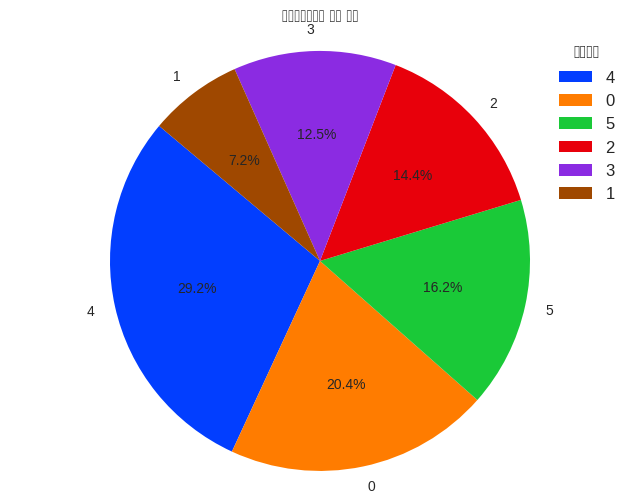

In [130]:
grade_counts = ch_df_customer_rfm['Cluster_6'].value_counts()
labels = grade_counts.index
sizes = grade_counts.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=sns.color_palette('bright'), autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
plt.title('클러스터등급별 고객 비율')
plt.axis('equal')

# 범례 추가, 위치를 지정하고 글꼴 크기 설정
plt.legend(labels, title="클러스터", loc="best", fontsize=12, title_fontsize="13")

plt.show()

In [131]:
df_cluster_sort

,Cluster_6,f_평균,r_평균,m_합계,m_비율,고객수,고객비율,일인당평균최종결제금액,일인당최종결제금액중앙값
0,1,96.64,14.66,1041347.33,21.18,106,7.22,9824.03,6042.405
1,5,69.30,63.77,1619740.77,32.94,238,16.21,6805.63,5218.160
2,0,56.26,203.48,1416073.85,28.80,299,20.37,4736.03,3786.450
3,3,13.29,29.47,252908.97,5.14,184,12.53,1374.51,1207.905
4,4,14.66,201.20,532291.76,10.83,429,29.22,1240.77,1043.680
5,2,2.97,207.45,54294.56,1.10,212,14.44,256.11,144.930


#### 클러스터 등급별 Monetary 비율 구하기 - RF 경우

In [132]:
ch_df_customer_rfm

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6
0,USER_1358,남,Chicago,12,340,297,36683.62,0
1,USER_0190,남,California,43,14,44,3069.51,1
2,USER_0066,남,Chicago,33,152,42,3024.89,0
3,USER_0345,여,California,30,365,1,7.74,2
4,USER_0683,남,California,49,124,6,883.78,2
...,...,...,...,...,...,...,...,...
1463,USER_0513,여,New York,41,1,9,500.21,3
1464,USER_0167,여,Chicago,48,1,19,3026.08,1
1465,USER_0845,남,New Jersey,19,1,5,761.86,3
1466,USER_0504,여,New York,45,1,8,1100.75,3


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

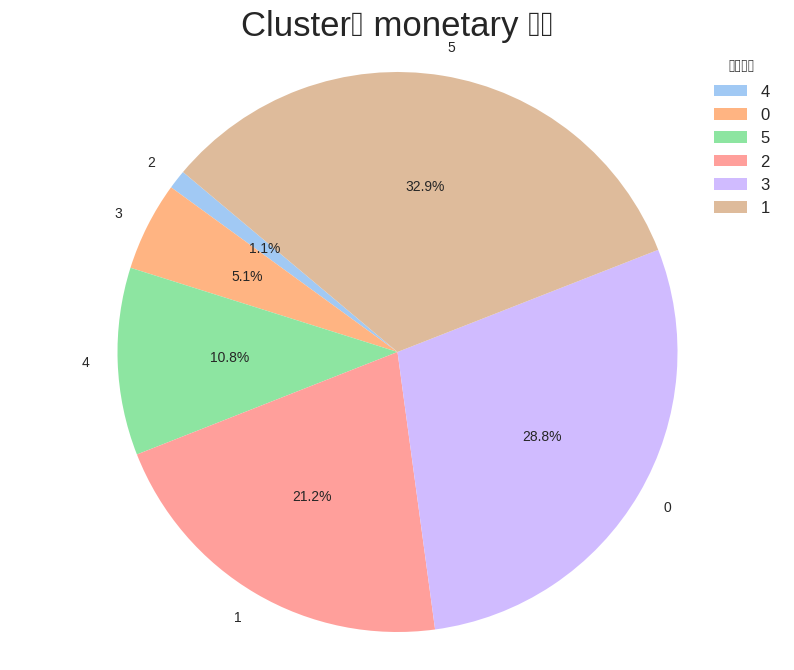

In [133]:
cluster_amount = df_customer_rfm.groupby('Cluster_6')['monetary'].sum().sort_values() / df_customer_rfm['monetary'].sum()*100

plt.figure(figsize=(10, 8))
plt.pie(cluster_amount, labels=cluster_amount.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), textprops={'fontsize': 10})
plt.title('Cluster별 monetary 비율', fontsize=25)
plt.axis('equal')  # 원형을 유지하기 위한 설정

# 범례 추가, 위치를 지정하고 글꼴 크기 설정
plt.legend(labels, title="클러스터", loc="best", fontsize=12, title_fontsize="13")

plt.show()

In [134]:
cluster_amount

Cluster_6
2     1.104298
3     5.143921
4    10.826294
1    21.179986
0    28.801557
5    32.943943
Name: monetary, dtype: float64

In [135]:
df_cluster_sort
# f_mean - 빈도 평균
# r_mean - 최근성 평균
# m_sum - 각 클러스터별 최종구매가격 합
# monetary_ratio - 각 클러스터의 monetary 비율
# customer - 각 클러스터별 고객 수
# customer_ratio - 각 클러스터별 고객 수 비율
# cs_monetary_mean - 각 클러스터별 1인당 평균 최종결제금액

,Cluster_6,f_평균,r_평균,m_합계,m_비율,고객수,고객비율,일인당평균최종결제금액,일인당최종결제금액중앙값
0,1,96.64,14.66,1041347.33,21.18,106,7.22,9824.03,6042.405
1,5,69.30,63.77,1619740.77,32.94,238,16.21,6805.63,5218.160
2,0,56.26,203.48,1416073.85,28.80,299,20.37,4736.03,3786.450
3,3,13.29,29.47,252908.97,5.14,184,12.53,1374.51,1207.905
4,4,14.66,201.20,532291.76,10.83,429,29.22,1240.77,1043.680
5,2,2.97,207.45,54294.56,1.10,212,14.44,256.11,144.930


<ipython-input-136-39cfb547b422>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ch_df_cluster, x='Cluster_6', y='일인당평균최종결제금액', palette='Set3')
<ipython-input-136-39cfb547b422>:24: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  plt.tight_layout()
<ipython-input-136-39cfb547b422>:24: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  plt.tight_layout()
<ipython-input-136-39cfb547b422>:24: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  plt.tight_layout()
<ipython-input-136-39cfb547b422>:24: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  plt.tight_layout()
<ipython-input-136-39cfb547b422>:24: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-1

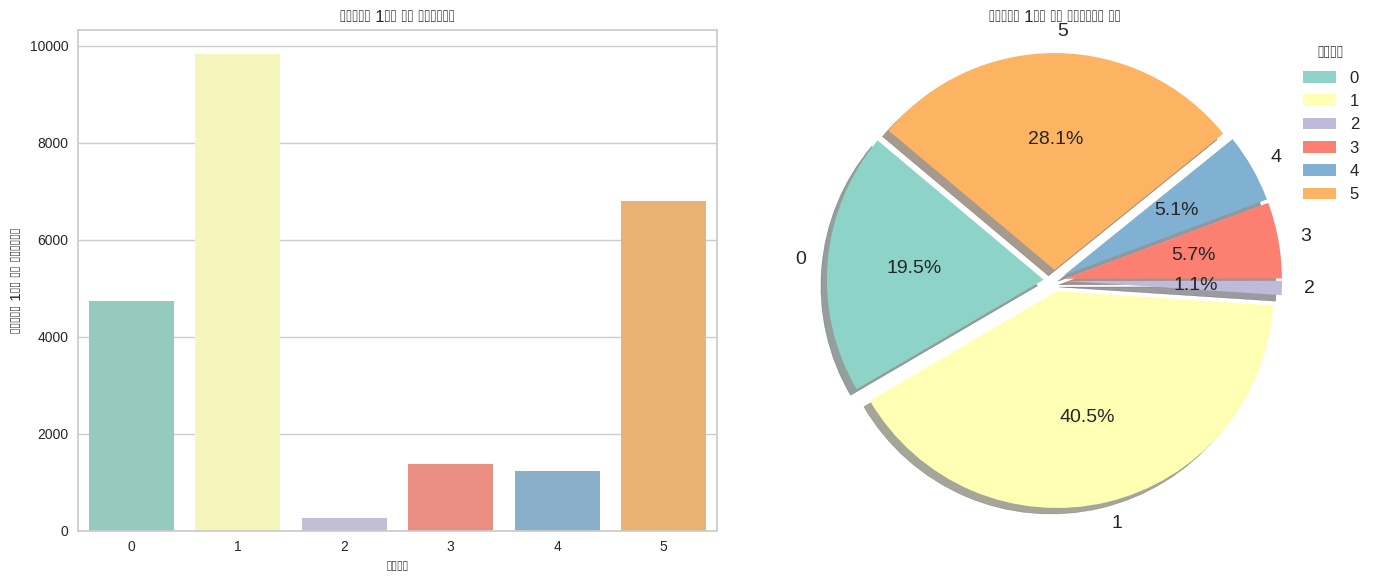

In [136]:
import matplotlib.patches as mpatches

plt.figure(figsize=(14, 6))

# 첫 번째 서브플롯: 막대그래프
plt.subplot(1, 2, 1)
sns.barplot(data=ch_df_cluster, x='Cluster_6', y='일인당평균최종결제금액', palette='Set3')
plt.title('클러스터별 1인당 평균 최종결제금액')
plt.xlabel('클러스터')
plt.ylabel('클러스터별 1인당 평균 최종결제금액')


# 두 번째 서브플롯: 파이 차트
plt.subplot(1, 2, 2)
explode = [0.05] * 6
plt.pie(ch_df_cluster['일인당평균최종결제금액'], labels=ch_df_cluster['Cluster_6'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'), explode=explode, shadow=True, textprops={'fontsize': 14})
plt.axis('equal')
plt.title('클러스터별 1인당 평균 최종결제금액 비율')

# 범례 추가, 위치를 지정하고 글꼴 크기 설정
plt.legend(ch_df_cluster['Cluster_6'], title="클러스터", loc="best", fontsize=12, title_fontsize="13")


plt.tight_layout()
plt.show()

#### 클러스터별 고객수 비율, 1인당 평균 최종결제금액 한눈에 보기

In [137]:
ch_df_cluster

,Cluster_6,f_평균,r_평균,m_합계,m_비율,고객수,고객비율,일인당평균최종결제금액,일인당최종결제금액중앙값
0,0,56.26,203.48,1416073.85,28.80,299,20.37,4736.03,3786.450
1,1,96.64,14.66,1041347.33,21.18,106,7.22,9824.03,6042.405
2,2,2.97,207.45,54294.56,1.10,212,14.44,256.11,144.930
3,3,13.29,29.47,252908.97,5.14,184,12.53,1374.51,1207.905
4,4,14.66,201.20,532291.76,10.83,429,29.22,1240.77,1043.680
5,5,69.30,63.77,1619740.77,32.94,238,16.21,6805.63,5218.160


<ipython-input-138-391aa727fbed>:134: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  plt.tight_layout()
<ipython-input-138-391aa727fbed>:134: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  plt.tight_layout()
<ipython-input-138-391aa727fbed>:134: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  plt.tight_layout()
<ipython-input-138-391aa727fbed>:134: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  plt.tight_layout()
<ipython-input-138-391aa727fbed>:134: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-138-391aa727fbed>:134: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
<ipython-input-138-391aa727fbed>:134: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  plt.tight_layout()
<ipython-input-138-391aa727fbed>:134: Us

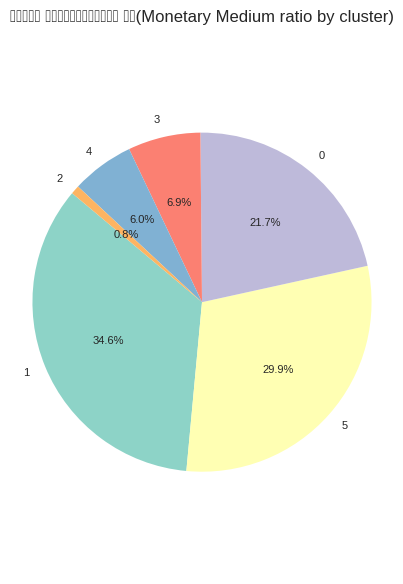

In [138]:
# # 첫 번째 그래프 - 막대
# plt.subplot(5, 2, 1)
# barplot_1 = sns.barplot(data=df_cluster_sort, x='Cluster_6', y='m_합계', palette='Set3')
# plt.title('클러스터별 최종결제금액 합계(Total Monetary by cluster)')
# plt.xlabel('클러스터(Cluster)')
# plt.ylabel('최종결제금액 합(CTotal Monetary)')
# # 막대 위에 값 표시
# for p in barplot_1.patches:
#     barplot_1.annotate(format(p.get_height(), '.1f'),
#                        (p.get_x() + p.get_width() / 2., p.get_height()),
#                        ha = 'center', va = 'center',
#                        xytext = (0, 9),
#                        textcoords = 'offset points')


# # 두 번째 그래프 - 파이차트
# plt.subplot(5, 2, 2)
# explode = [0.05] * 6
# plt.pie(df_cluster_sort['m_비율'], labels=df_cluster_sort['Cluster_6'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'), explode=explode, shadow=True, textprops={'fontsize': 10})
# plt.axis('equal')
# plt.title('클러스터별 최종결제금액 비율(Total Monetary ratio by cluster)')
# # # 범례 추가, 위치를 지정하고 글꼴 크기 설정
# # plt.legend(labels, title="클러스터", loc="best", fontsize=12, title_fontsize="13")



# # 세 번째 그래프 - 막대
# plt.subplot(5, 2, 3)
# barplot_2 = sns.barplot(data=df_cluster_sort, x='Cluster_6', y='고객수', palette='Set2')
# plt.title('클러스터별 고객 수(Number of customers by cluster)')
# plt.xlabel('클러스터(Cluster)')
# plt.ylabel('고객 수(Customer Count)')
# # 막대 위에 값 표시
# for p in barplot_2.patches:
#     barplot_2.annotate(format(p.get_height(), '.1f'),
#                        (p.get_x() + p.get_width() / 2., p.get_height()),
#                        ha = 'center', va = 'center',
#                        xytext = (0, 9),
#                        textcoords = 'offset points')


# # 네번째 그래프 - 파이차트
# plt.subplot(5, 2, 4)
# explode = [0.05] * 6
# plt.pie(df_cluster_sort['고객비율'], labels=df_cluster_sort['Cluster_6'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'), explode=explode, shadow=True, textprops={'fontsize': 10})
# plt.axis('equal')
# plt.title('클러스터별 1인당 평균 최종결제금액 비율(Customer ratio by cluste)')
# # # 범례 추가, 위치를 지정하고 글꼴 크기 설정
# # plt.legend(labels, title="클러스터", loc="best", fontsize=12, title_fontsize="13")



# # 다섯번째 그래프 - 막대
# plt.subplot(5, 2, 5)
# barplot_3 = sns.barplot(data=df_cluster_sort, x='Cluster_6', y='일인당평균최종결제금액', palette='Set1')
# plt.title('클러스터별 1인당 평균 최종결제금액(Monetary by cluster)')
# plt.xlabel('클러스터(Cluster)')
# plt.ylabel('클러스터별 1인당 평균 최종결제금액(per mean Monetary)')
# # 막대 위에 값 표시
# for p in barplot_3.patches:
#     barplot_3.annotate(format(p.get_height(), '.1f'),
#                        (p.get_x() + p.get_width() / 2., p.get_height()),
#                        ha = 'center', va = 'center',
#                        xytext = (0, 9),
#                        textcoords = 'offset points')


# # 여섯번째 그래프 - 파이차트
# plt.subplot(5, 2, 6)
# explode = [0.05] * 6
# plt.pie(df_cluster_sort['일인당평균최종결제금액'], labels=df_cluster_sort['Cluster_6'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set1'), explode=explode, shadow=True, textprops={'fontsize': 10})
# plt.axis('equal')
# plt.title('클러스터별 1인당 평균 최종결제금액 비율(Monetary ratio by cluster)')
# # # 범례 추가, 위치를 지정하고 글꼴 크기 설정
# # plt.legend(labels, title="클러스터", loc="best", fontsize=12, title_fontsize="13")


# # 일곱번째 그래프 - 막대
# plt.subplot(5, 2, 7)
# barplot_4 = sns.barplot(data=df_cluster_sort, x='Cluster_6', y='최종결제금액중앙값', palette='Set1')
# plt.title('클러스터별 최종결제금액 중앙값(Monetary Medium by cluster)')
# plt.xlabel('클러스터(Cluster)')
# plt.ylabel('최종결제금액 중앙값(Monetary Medium)')
# # 막대 위에 값 표시
# for p in barplot_4.patches:
#     barplot_4.annotate(format(p.get_height(), '.1f'),
#                        (p.get_x() + p.get_width() / 2., p.get_height()),
#                        ha = 'center', va = 'center',
#                        xytext = (0, 9),
#                        textcoords = 'offset points')



plt.figure(figsize=(8, 6))

# # 여덟번째 그래프 - 파이차트
# plt.subplot(1, 2, 1)
# colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#2e86c1', '#f39c12']
# # explode = [0.05] * 6
# plt.pie(df_cluster_sort['최종결제금액중앙값'], labels=df_cluster_sort['Cluster_6'], autopct='%1.1f%%', startangle=140, colors=colors, shadow=False, textprops={'fontsize': 10})
# plt.axis('equal')
# plt.title('클러스터별 최종결제금액 중앙값 비율(Monetary Medium ratio by cluster)')
# # 범례 추가, 위치를 지정하고 글꼴 크기 설정
# plt.legend(labels, title="클러스터", loc="best", fontsize=12, title_fontsize="13")



# # 아홉번째 그래프 - 막대
# plt.subplot(5, 2, 9)
# barplot_4 = sns.barplot(data=df_cluster_sort, x='Cluster_6', y='일인당최종결제금액중앙값', palette='Set1')
# plt.title('클러스터별 최종결제금액 중앙값(per Monetary Medium by cluster)')
# plt.xlabel('클러스터(Cluster)')
# plt.ylabel('일인당최종결제금액중앙값(per Monetary Medium)')
# # 막대 위에 값 표시
# for p in barplot_4.patches:
#     barplot_4.annotate(format(p.get_height(), '.1f'),
#                        (p.get_x() + p.get_width() / 2., p.get_height()),
#                        ha = 'center', va = 'center',
#                        xytext = (0, 9),
#                        textcoords = 'offset points')


# 열번째 그래프 - 파이차트
plt.subplot(1, 2, 2)
# explode = [0.05] * 6
plt.pie(df_cluster_sort['일인당최종결제금액중앙값'], labels=df_cluster_sort['Cluster_6'], autopct='%1.1f%%', startangle=140, colors=colors, shadow=False, textprops={'fontsize': 8})
plt.axis('equal')
plt.title('클러스터별 일인당최종결제금액중앙값 비율(Monetary Medium ratio by cluster)')
# # 범례 추가, 위치를 지정하고 글꼴 크기 설정
# plt.legend(labels, title="클러스터", loc="best", fontsize=12, title_fontsize="13")



plt.tight_layout()
plt.show()

In [139]:
df_cluster_sort

,Cluster_6,f_평균,r_평균,m_합계,m_비율,고객수,고객비율,일인당평균최종결제금액,일인당최종결제금액중앙값
0,1,96.64,14.66,1041347.33,21.18,106,7.22,9824.03,6042.405
1,5,69.30,63.77,1619740.77,32.94,238,16.21,6805.63,5218.160
2,0,56.26,203.48,1416073.85,28.80,299,20.37,4736.03,3786.450
3,3,13.29,29.47,252908.97,5.14,184,12.53,1374.51,1207.905
4,4,14.66,201.20,532291.76,10.83,429,29.22,1240.77,1043.680
5,2,2.97,207.45,54294.56,1.10,212,14.44,256.11,144.930


- 각 클러스터별 최종결제금액 비율은 5 > 0 > 1 > 4 > 3 > 2

- 각 클러스터별 고객 비율은 4 > 0 > 5 > 2 > 3 > 1

- 각 클러스터별 1인당 평균 최종결제금액 비율은 1 > 5 > 0 > 3 > 4 > 2

- 각 클러스터별 최종결제금액 중앙값 비율은 1 > 5 > 0 > 3 > 4 > 2

- 각 클러스터별 1인당 최종결제금액 중앙값 비율은 1 > 5 > 0 > 3 > 4 > 2


##### 따라서 최종결제금액이 높다고 해서 1인당 평균 최종결제금액이 높은 것은 아님.

----

한 클러스터 내에서 최종결제금액이 가장 높은 고객과 낮은 고객에 따라 해당 클러스터의 1인당 평균 최종결제금액에 영향을 미치기 때문에 기존 VIP 및 잠재적 VIP 기준 가설 변경

### 기준 변경
```
기존 VIP 가설 : 클러스터별 1인당 평균 최종결제금액 기준
변경 VIP 가설 : 클러스터별 최종결제금액을 기준
````
- 클러스터별 최종결제금액을 기준(변경된 VIP 가설)에 영향을 미치는 변수 찾기

#### RFM이 있는 데이터에서 상관관계 분석

In [141]:
ch_df_customer_rfm

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6
0,USER_1358,남,Chicago,12,340,297,36683.62,0
1,USER_0190,남,California,43,14,44,3069.51,1
2,USER_0066,남,Chicago,33,152,42,3024.89,0
3,USER_0345,여,California,30,365,1,7.74,2
4,USER_0683,남,California,49,124,6,883.78,2
...,...,...,...,...,...,...,...,...
1463,USER_0513,여,New York,41,1,9,500.21,3
1464,USER_0167,여,Chicago,48,1,19,3026.08,1
1465,USER_0845,남,New Jersey,19,1,5,761.86,3
1466,USER_0504,여,New York,45,1,8,1100.75,3


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(b

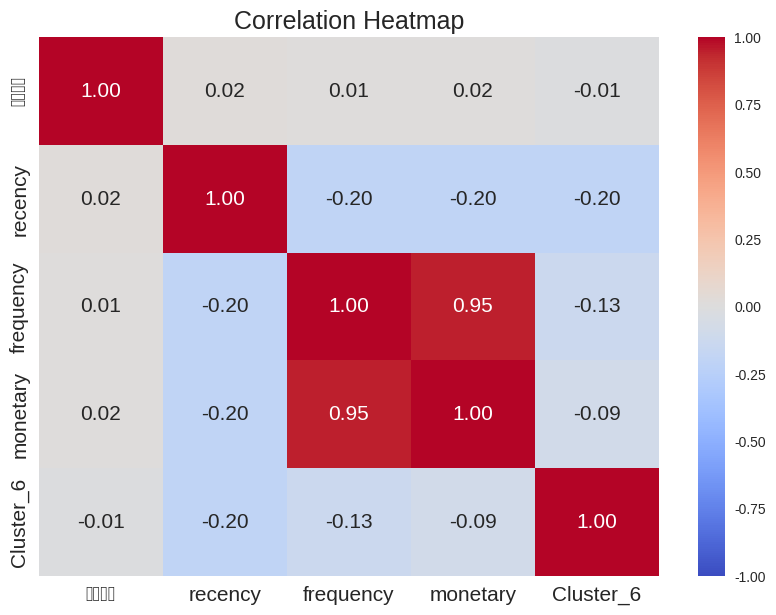

In [142]:
ch_correlation_matrix_1 = ch_df_customer_rfm.drop(columns=['고객ID', '성별', '고객지역']).corr()

# 히트맵 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(ch_correlation_matrix_1, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 15})
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

```
- 최종결제금액(Monetary)와 빈도수(Frequuency)는 상관계수가 0.95로 양의 매우 강한 상관관계를 가지고 있다.
```

```
피어슨 상관계수의 일반적인 해석 기준

0.00 - 0.19: 매우 약한 상관관계
0.20 - 0.39: 약한 상관관계
0.40 - 0.59: 중간 정도의 상관관계
0.60 - 0.79: 강한 상관관계
0.80 - 1.0: 매우 강한 상관관계
```

In [143]:
df_cluster_sort.corr()

,Cluster_6,f_평균,r_평균,m_합계,m_비율,고객수,고객비율,일인당평균최종결제금액,일인당최종결제금액중앙값
Cluster_6,1.000000,-0.242954,-0.181270,-0.025995,-0.025996,0.307905,0.307669,-0.202826,-0.147999
f_평균,-0.242954,1.000000,-0.521406,0.806617,0.806631,-0.435147,-0.435023,0.995083,0.990807
r_평균,-0.181270,-0.521406,1.000000,-0.192951,-0.192888,0.719562,0.719683,-0.581976,-0.547431
m_합계,-0.025995,0.806617,-0.192951,1.000000,1.000000,0.007792,0.007937,0.759730,0.856122
m_비율,-0.025996,0.806631,-0.192888,1.000000,1.000000,0.007932,0.008076,0.759742,0.856122
고객수,0.307905,-0.435147,0.719562,0.007792,0.007932,1.000000,1.000000,-0.487650,-0.409085
고객비율,0.307669,-0.435023,0.719683,0.007937,0.008076,1.000000,1.000000,-0.487549,-0.408976
일인당평균최종결제금액,-0.202826,0.995083,-0.581976,0.759730,0.759742,-0.487650,-0.487549,1.000000,0.984461
일인당최종결제금액중앙값,-0.147999,0.990807,-0.547431,0.856122,0.856122,-0.409085,-0.408976,0.984461,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/sea

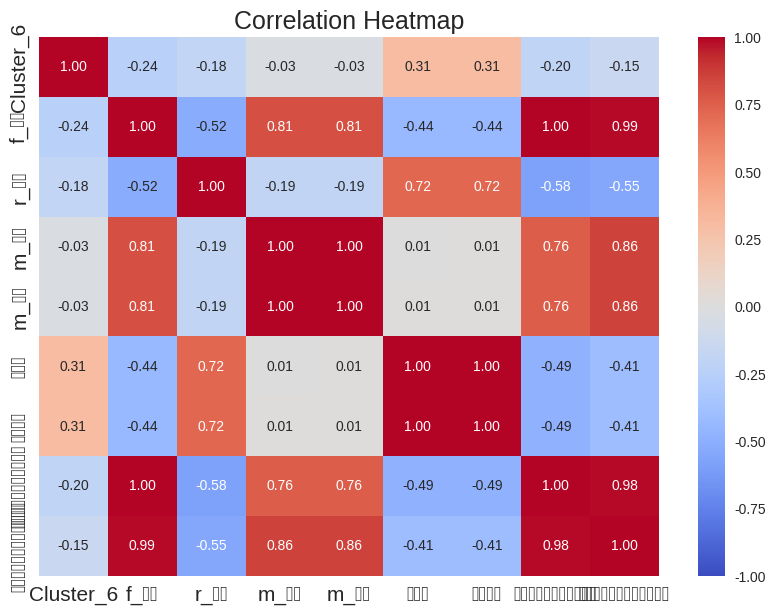

In [144]:
# 피어슨 상관계수 계산
ch_correlation_matrix_2 = df_cluster_sort.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(ch_correlation_matrix_2, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 가설: R이 낮고, F가 높은 클러스터 그룹이 최근에 자주 구매한 고객 그룹이다. 따라서 VIP 기준을 R이 낮고 F가 높은 그룹으로 한다.

### vip 기준을 찾기 위해 최근성(R)과 빈도(F)의 조합 분석 진행

#### 1. 기술 통계 (조합 분석을 위해)
- 전체 고객 데이터의 R과 F 값에 대한 평균, 중앙값, 표준편차 등을 계산하여,
- 이를 기준으로 '높음'과 '낮음'을 정의할 수 있습니다.
- 예를 들어, 평균보다 높은 값을 '높음', 평균 이하를 '낮음'으로 분류할 수 있습니다.

In [145]:
df_cluster_sort

,Cluster_6,f_평균,r_평균,m_합계,m_비율,고객수,고객비율,일인당평균최종결제금액,일인당최종결제금액중앙값
0,1,96.64,14.66,1041347.33,21.18,106,7.22,9824.03,6042.405
1,5,69.30,63.77,1619740.77,32.94,238,16.21,6805.63,5218.160
2,0,56.26,203.48,1416073.85,28.80,299,20.37,4736.03,3786.450
3,3,13.29,29.47,252908.97,5.14,184,12.53,1374.51,1207.905
4,4,14.66,201.20,532291.76,10.83,429,29.22,1240.77,1043.680
5,2,2.97,207.45,54294.56,1.10,212,14.44,256.11,144.930


In [146]:
# 피벗 테이블 생성
df_cluster2 = df_rfm.pivot_table(index='Cluster_6',
                                 values=['recency', 'frequency'],
                                 aggfunc={'recency': [np.median, np.std, np.sum],
                                          'frequency': [np.median, np.std, np.sum]})

# 칼럼명 변경
df_cluster2.columns = ['_'.join(col).strip() for col in df_cluster2.columns.values]

# 이중 칼럼명 제거
df_cluster2.reset_index(inplace=True)

df_cluster2

,Cluster_6,frequency_median,frequency_std,frequency_sum,recency_median,recency_std,recency_sum
0,0,48.0,32.009548,16823,187.0,73.696516,60840
1,1,57.5,111.138454,10244,14.0,7.213594,1554
2,2,3.0,1.744090,630,203.0,86.441129,43980
3,3,13.0,6.994039,2445,26.0,16.547310,5423
4,4,14.0,5.254351,6289,194.0,81.436644,86315
5,5,52.0,60.827064,16493,61.5,22.824250,15177


In [147]:
df_cluster_sort = pd.merge(ch_df_cluster, df_cluster2, on='Cluster_6') # 두 데이터 병합

# 칼럼명 변경
df_cluster_sort.rename(columns={'recency_sum' : 'r_합계',
                                'recency_median': 'r_중앙값',
                                'recency_std': 'r_표준편차',
                                'frequency_sum' : 'f_합계',
                                'frequency_median': 'f_중앙값',
                                'frequency_std': 'f_표준편차'}, inplace=True)
df_cluster_sort

,Cluster_6,f_평균,r_평균,m_합계,m_비율,고객수,고객비율,일인당평균최종결제금액,일인당최종결제금액중앙값,f_중앙값,f_표준편차,f_합계,r_중앙값,r_표준편차,r_합계
0,0,56.26,203.48,1416073.85,28.80,299,20.37,4736.03,3786.450,48.0,32.009548,16823,187.0,73.696516,60840
1,1,96.64,14.66,1041347.33,21.18,106,7.22,9824.03,6042.405,57.5,111.138454,10244,14.0,7.213594,1554
2,2,2.97,207.45,54294.56,1.10,212,14.44,256.11,144.930,3.0,1.744090,630,203.0,86.441129,43980
3,3,13.29,29.47,252908.97,5.14,184,12.53,1374.51,1207.905,13.0,6.994039,2445,26.0,16.547310,5423
4,4,14.66,201.20,532291.76,10.83,429,29.22,1240.77,1043.680,14.0,5.254351,6289,194.0,81.436644,86315
5,5,69.30,63.77,1619740.77,32.94,238,16.21,6805.63,5218.160,52.0,60.827064,16493,61.5,22.824250,15177


<ipython-input-152-5c99251c1677>:68: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  plt.tight_layout()
<ipython-input-152-5c99251c1677>:68: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  plt.tight_layout()
<ipython-input-152-5c99251c1677>:68: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  plt.tight_layout()
<ipython-input-152-5c99251c1677>:68: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  plt.tight_layout()
<ipython-input-152-5c99251c1677>:68: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-152-5c99251c1677>:68: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
<ipython-input-152-5c99251c1677>:68: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.tight_layout()
<ipython-input-152-5c99251c1677>:68: User

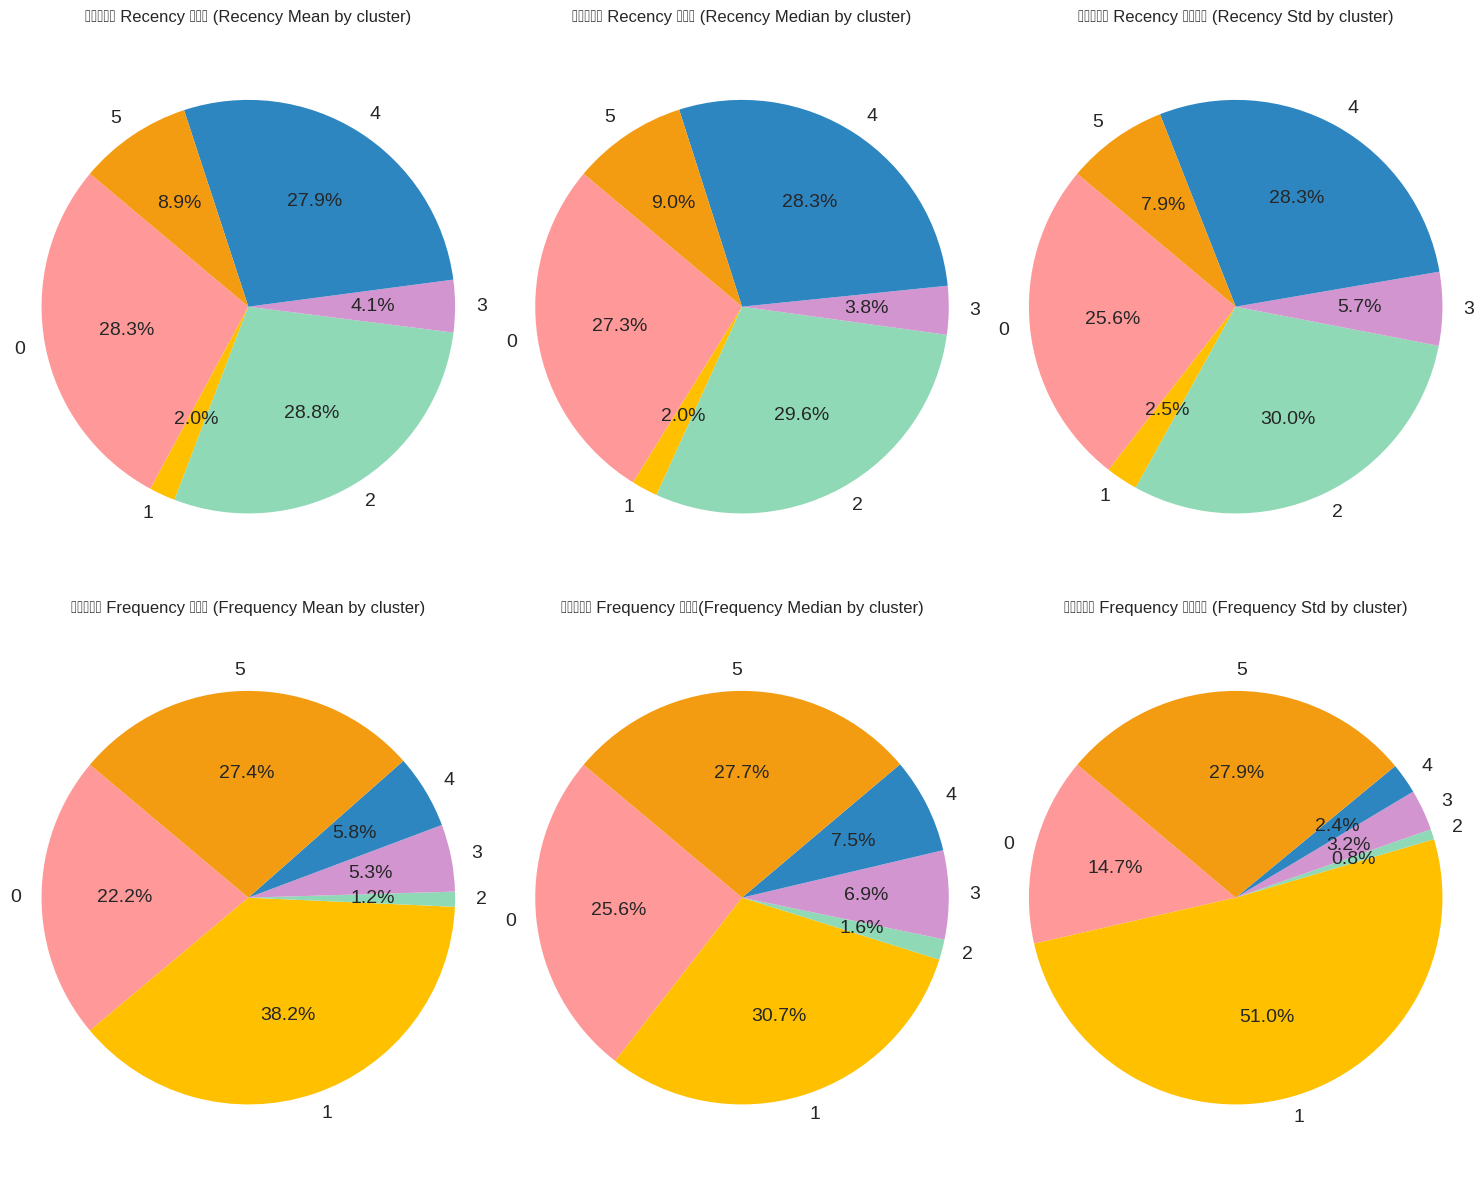

In [152]:
plt.figure(figsize=(15, 12))
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#2e86c1', '#f39c12']

# Recency
# 첫 번째 그래프 - 막대
plt.subplot(2, 3, 1)
explode = [0.05] * 6
plt.pie(df_cluster_sort['r_평균'], labels=df_cluster_sort['Cluster_6'], autopct='%1.1f%%', startangle=140, colors=colors, shadow=False, textprops={'fontsize': 14})
plt.axis('equal')
plt.title('클러스터별 Recency 평균값 (Recency Mean by cluster)')
# # 범례 추가, 위치를 지정하고 글꼴 크기 설정
# plt.legend(labels, title="클러스터", loc="best", fontsize=12, title_fontsize="13")


# 두 번째 그래프 - 파이차트
plt.subplot(2, 3, 2)
explode = [0.05] * 6
plt.pie(df_cluster_sort['r_중앙값'], labels=df_cluster_sort['Cluster_6'], autopct='%1.1f%%', startangle=140, colors=colors, shadow=False, textprops={'fontsize': 14})
plt.axis('equal')
plt.title('클러스터별 Recency 중앙값 (Recency Median by cluster)')
# # 범례 추가, 위치를 지정하고 글꼴 크기 설정
# plt.legend(labels, title="클러스터", loc="best", fontsize=12, title_fontsize="13")


# 세 번째 그래프 - 막대
plt.subplot(2, 3, 3)
explode = [0.05] * 6
plt.pie(df_cluster_sort['r_표준편차'], labels=df_cluster_sort['Cluster_6'], autopct='%1.1f%%', startangle=140, colors=colors, shadow=False, textprops={'fontsize': 14})
plt.axis('equal')
plt.title('클러스터별 Recency 표준편차 (Recency Std by cluster)')
# # 범례 추가, 위치를 지정하고 글꼴 크기 설정
# plt.legend(labels, title="클러스터", loc="best", fontsize=12, title_fontsize="13")



# Frequency
# 네번째 그래프 - 파이차트
plt.subplot(2, 3, 4)
explode = [0.05] * 6
plt.pie(df_cluster_sort['f_평균'], labels=df_cluster_sort['Cluster_6'], autopct='%1.1f%%', startangle=140, colors=colors, shadow=False, textprops={'fontsize': 14})
plt.axis('equal')
plt.title('클러스터별 Frequency 평균값 (Frequency Mean by cluster)')
# # 범례 추가, 위치를 지정하고 글꼴 크기 설정
# plt.legend(labels, title="클러스터", loc="best", fontsize=12, title_fontsize="13")



# 다섯번째 그래프 - 막대
plt.subplot(2, 3, 5)
explode = [0.05] * 6
plt.pie(df_cluster_sort['f_중앙값'], labels=df_cluster_sort['Cluster_6'], autopct='%1.1f%%', startangle=140, colors=colors, shadow=False, textprops={'fontsize': 14})
plt.axis('equal')
plt.title('클러스터별 Frequency 중앙값(Frequency Median by cluster)')
# # 범례 추가, 위치를 지정하고 글꼴 크기 설정
# plt.legend(labels, title="클러스터", loc="best", fontsize=12, title_fontsize="13")


# 여섯번째 그래프 - 파이차트
plt.subplot(2, 3, 6)
explode = [0.05] * 6
plt.pie(df_cluster_sort['f_표준편차'], labels=df_cluster_sort['Cluster_6'], autopct='%1.1f%%', startangle=140, colors=colors, shadow=False, textprops={'fontsize': 14})
plt.axis('equal')
plt.title('클러스터별 Frequency 표준편차 (Frequency Std by cluster)')
# # 범례 추가, 위치를 지정하고 글꼴 크기 설정
# plt.legend(labels, title="클러스터", loc="best", fontsize=12, title_fontsize="13")


plt.tight_layout()
plt.show()

#### Recency (낮은 순으로 왼쪽부터 정렬)
- 최근성(Recency)의 평균값 경우, 1 < 3 < 5 < 4 (27.9 % - 201.20) < 0 (28.3 % - 203.48) < 2
- 최근성(Recency)의 중앙값 경우, 1 < 3 < 5 < 0 (27.3 % - 187) < 4 (28.3 % - 194) < 2
- 최근성(Recency)의 표준편차 경우, 1 < 3 < 5 < 0 (25.6 %) < 4 (28.3 %) < 2
- 따라서 최근성(Recency)은 1 < 3 < 5 < 0  < 4 < 2 순이다.

#### Frequency  (높은 순으로 정렬)
- 빈도(Frequency)의 평균값 경우, 1 > 5 > 0 > 4 > 3 > 2
- 빈도(Frequency)의 중앙값 경우, 1 > 5 > 0 > 4 > 3 > 2
- 빈도(Frequency)의 표준편차 경우, 1 > 5 > 0 > 3 > 4 > 2
- 따라서 빈도(Frequency)는 1 < 5 < 0 < 4 < 3 < 2 순이다.

#### Monetary  (높은 순으로 정렬)
- 최종결제금액(Monetary)의 경우, 5 > 0 > 1 > 4 > 3 > 2
- 최종결제금액(Monetary)의 중앙값 경우, 1 > 5 > 0 > 3 > 4 > 2
- 1인당 최종결제금액(Monetary)의 중앙값 경우, 1 > 5 > 0 > 3 > 4 > 2
- 1인당 최종결제금액(Monetary)의 평균값 경우, 1 > 5 > 0 > 3 > 4 > 2
- '최종결제금액의 총합'보다 '최종결제금액의 중앙값', '1인당 최종결제금액의 중앙값', '1인당 최종결제금액의 평균값'의 순서가 동일하고, 더욱 근접?그럴듯?하기 때문에 그것들의 순서로 Monetary를 정하려고 함.
- 따라서 최종결제금액(Monetary)는 1 > 5 > 0 > 3 > 4 > 2 순이다.

#### 따라서 최근성과 빈도의 통계값을 확인해본 결과, 클러스터 1 그룹이 F가 높고 R이 낮음으로
####  클러스터 1 그룹이 VIP 그룹으로 선정됨.

- 1 (최근성은 1번째, 빈도수는 1번째, 최종결제금액은 1번째 - 총평균은 1) - VIP 고객
- 5 (최근성은 3번째, 빈도수는 2번째,  최종결제금액은 2번째 - 총평균은 2.3) - 잠재적 VIP 고객
- 0 (최근성은 4번째, 빈도수는 3번째, 최종결제금액은 3번째 - 총평균은 3.3) - 충성 고객
- 3 (최근성은 2번째, 빈도수는 5번째, 최종결제금액은 4번째 - 총평균은 3.6) - 잠재적 충성 고객
- 4 (최근성은 5번째, 빈도수는 4번째, 최종결제금액은 5번째 - 총평균은 4.6) - 잠재적 이탈 고객
- 2 (최근성은 6번째, 빈도수는 6번째, 최종결제금액은 6번째 - 총평균은 6) - 이탈 고객

In [153]:
df_cluster_sort

,Cluster_6,f_평균,r_평균,m_합계,m_비율,고객수,고객비율,일인당평균최종결제금액,일인당최종결제금액중앙값,f_중앙값,f_표준편차,f_합계,r_중앙값,r_표준편차,r_합계
0,0,56.26,203.48,1416073.85,28.80,299,20.37,4736.03,3786.450,48.0,32.009548,16823,187.0,73.696516,60840
1,1,96.64,14.66,1041347.33,21.18,106,7.22,9824.03,6042.405,57.5,111.138454,10244,14.0,7.213594,1554
2,2,2.97,207.45,54294.56,1.10,212,14.44,256.11,144.930,3.0,1.744090,630,203.0,86.441129,43980
3,3,13.29,29.47,252908.97,5.14,184,12.53,1374.51,1207.905,13.0,6.994039,2445,26.0,16.547310,5423
4,4,14.66,201.20,532291.76,10.83,429,29.22,1240.77,1043.680,14.0,5.254351,6289,194.0,81.436644,86315
5,5,69.30,63.77,1619740.77,32.94,238,16.21,6805.63,5218.160,52.0,60.827064,16493,61.5,22.824250,15177


In [154]:
df_cluster_sort['고객 세그먼테이션'] = '일반'
df_cluster_sort.loc[df_cluster_sort['Cluster_6'] == 1, '고객 세그먼테이션'] = 'VIP 고객_1'
df_cluster_sort.loc[df_cluster_sort['Cluster_6'] == 5, '고객 세그먼테이션'] = '잠재적 VIP 고객_2'
df_cluster_sort.loc[df_cluster_sort['Cluster_6'] == 0, '고객 세그먼테이션'] = '충성 고객_3'
df_cluster_sort.loc[df_cluster_sort['Cluster_6'] == 3, '고객 세그먼테이션'] = '잠재적 충성 고객_4'
df_cluster_sort.loc[df_cluster_sort['Cluster_6'] == 4, '고객 세그먼테이션'] = '잠재적 이탈 고객_5'
df_cluster_sort.loc[df_cluster_sort['Cluster_6'] == 2, '고객 세그먼테이션'] = '이탈 고객_6'
df_cluster_sort

,Cluster_6,f_평균,r_평균,m_합계,m_비율,고객수,고객비율,일인당평균최종결제금액,일인당최종결제금액중앙값,f_중앙값,f_표준편차,f_합계,r_중앙값,r_표준편차,r_합계,고객 세그먼테이션
0,0,56.26,203.48,1416073.85,28.80,299,20.37,4736.03,3786.450,48.0,32.009548,16823,187.0,73.696516,60840,충성 고객_3
1,1,96.64,14.66,1041347.33,21.18,106,7.22,9824.03,6042.405,57.5,111.138454,10244,14.0,7.213594,1554,VIP 고객_1
2,2,2.97,207.45,54294.56,1.10,212,14.44,256.11,144.930,3.0,1.744090,630,203.0,86.441129,43980,이탈 고객_6
3,3,13.29,29.47,252908.97,5.14,184,12.53,1374.51,1207.905,13.0,6.994039,2445,26.0,16.547310,5423,잠재적 충성 고객_4
4,4,14.66,201.20,532291.76,10.83,429,29.22,1240.77,1043.680,14.0,5.254351,6289,194.0,81.436644,86315,잠재적 이탈 고객_5
5,5,69.30,63.77,1619740.77,32.94,238,16.21,6805.63,5218.160,52.0,60.827064,16493,61.5,22.824250,15177,잠재적 VIP 고객_2


#### 2. 백분위수

#### 고객 데이터 분석 (클러스터 그룹별 분석) - 1 > 5 > 0 > 3 > 4 > 2

#### 고객 세그먼테이션 기준으로 EDA

In [155]:
ch_df_customer_rfm

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6
0,USER_1358,남,Chicago,12,340,297,36683.62,0
1,USER_0190,남,California,43,14,44,3069.51,1
2,USER_0066,남,Chicago,33,152,42,3024.89,0
3,USER_0345,여,California,30,365,1,7.74,2
4,USER_0683,남,California,49,124,6,883.78,2
...,...,...,...,...,...,...,...,...
1463,USER_0513,여,New York,41,1,9,500.21,3
1464,USER_0167,여,Chicago,48,1,19,3026.08,1
1465,USER_0845,남,New Jersey,19,1,5,761.86,3
1466,USER_0504,여,New York,45,1,8,1100.75,3


In [156]:
ch_df_customer_rfm['고객 세그먼테이션'] = '일반'
ch_df_customer_rfm.loc[ch_df_customer_rfm['Cluster_6'] == 1, '고객 세그먼테이션'] = 'VIP_1'
ch_df_customer_rfm.loc[ch_df_customer_rfm['Cluster_6'] == 5, '고객 세그먼테이션'] = '잠재적 VIP 고객_2'
ch_df_customer_rfm.loc[ch_df_customer_rfm['Cluster_6'] == 0, '고객 세그먼테이션'] = '충성 고객_3'
ch_df_customer_rfm.loc[ch_df_customer_rfm['Cluster_6'] == 3, '고객 세그먼테이션'] = '잠재적 충성 고객_4'
ch_df_customer_rfm.loc[ch_df_customer_rfm['Cluster_6'] == 4, '고객 세그먼테이션'] = '잠재적 이탈 고객_5'
ch_df_customer_rfm.loc[ch_df_customer_rfm['Cluster_6'] == 2, '고객 세그먼테이션'] = '이탈 고객_6'
ch_df_customer_rfm

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6,고객 세그먼테이션
0,USER_1358,남,Chicago,12,340,297,36683.62,0,충성 고객_3
1,USER_0190,남,California,43,14,44,3069.51,1,VIP_1
2,USER_0066,남,Chicago,33,152,42,3024.89,0,충성 고객_3
3,USER_0345,여,California,30,365,1,7.74,2,이탈 고객_6
4,USER_0683,남,California,49,124,6,883.78,2,이탈 고객_6
...,...,...,...,...,...,...,...,...,...
1463,USER_0513,여,New York,41,1,9,500.21,3,잠재적 충성 고객_4
1464,USER_0167,여,Chicago,48,1,19,3026.08,1,VIP_1
1465,USER_0845,남,New Jersey,19,1,5,761.86,3,잠재적 충성 고객_4
1466,USER_0504,여,New York,45,1,8,1100.75,3,잠재적 충성 고객_4


#### 고객 세그먼테이션별 쿠폰 상태 확인
#### -> 그룹별 쿠폰 발급 마케팅 전략 세움.
```
가설: VIP 와 잠재적 VIP는 쿠폰 사용이 많을 것이다.
```

In [158]:
# 각 고객별 구매빈도가 많은 제품카테고리 및 빈도수가 많은 쿠폰상태 추가
df_cluster_coupon = df_onlinesales_raw.groupby('고객ID').agg({'제품카테고리': lambda x: x.mode().iloc[0],
                                                              '쿠폰상태': lambda x: x.mode().iloc[0]}).reset_index()
df_cluster_coupon

,고객ID,제품카테고리,쿠폰상태
0,USER_0000,Apparel,Used
1,USER_0001,Nest-USA,Clicked
2,USER_0002,Office,Clicked
3,USER_0003,Apparel,Clicked
4,USER_0004,Apparel,Clicked
...,...,...,...
1463,USER_1463,Apparel,Used
1464,USER_1464,Apparel,Clicked
1465,USER_1465,Apparel,Clicked
1466,USER_1466,Nest-USA,Not Used


In [159]:
ch_df_customer_rfm.head()

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6,고객 세그먼테이션
0,USER_1358,남,Chicago,12,340,297,36683.62,0,충성 고객_3
1,USER_0190,남,California,43,14,44,3069.51,1,VIP_1
2,USER_0066,남,Chicago,33,152,42,3024.89,0,충성 고객_3
3,USER_0345,여,California,30,365,1,7.74,2,이탈 고객_6
4,USER_0683,남,California,49,124,6,883.78,2,이탈 고객_6


In [160]:
# df_customer, df_rfm 고객ID별 데이터 합치기
df_cluster_coupon = pd.merge(ch_df_customer_rfm, df_cluster_coupon, on=['고객ID'], how='left')
df_cluster_coupon

,고객ID,성별,고객지역,가입기간,recency,frequency,monetary,Cluster_6,고객 세그먼테이션,제품카테고리,쿠폰상태
0,USER_1358,남,Chicago,12,340,297,36683.62,0,충성 고객_3,Nest-USA,Clicked
1,USER_0190,남,California,43,14,44,3069.51,1,VIP_1,Nest-USA,Clicked
2,USER_0066,남,Chicago,33,152,42,3024.89,0,충성 고객_3,Apparel,Clicked
3,USER_0345,여,California,30,365,1,7.74,2,이탈 고객_6,Lifestyle,Clicked
4,USER_0683,남,California,49,124,6,883.78,2,이탈 고객_6,Nest-USA,Clicked
...,...,...,...,...,...,...,...,...,...,...,...
1463,USER_0513,여,New York,41,1,9,500.21,3,잠재적 충성 고객_4,Office,Used
1464,USER_0167,여,Chicago,48,1,19,3026.08,1,VIP_1,Nest-USA,Clicked
1465,USER_0845,남,New Jersey,19,1,5,761.86,3,잠재적 충성 고객_4,Nest-USA,Clicked
1466,USER_0504,여,New York,45,1,8,1100.75,3,잠재적 충성 고객_4,Nest-USA,Clicked


In [161]:
df_vip = df_cluster_coupon[df_cluster_coupon['고객 세그먼테이션'] == 'VIP_1']
df_previp = df_cluster_coupon[df_cluster_coupon['고객 세그먼테이션'] == '잠재적 VIP 고객_2']

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54256 (\N{HANGUL SYLLABLE PON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


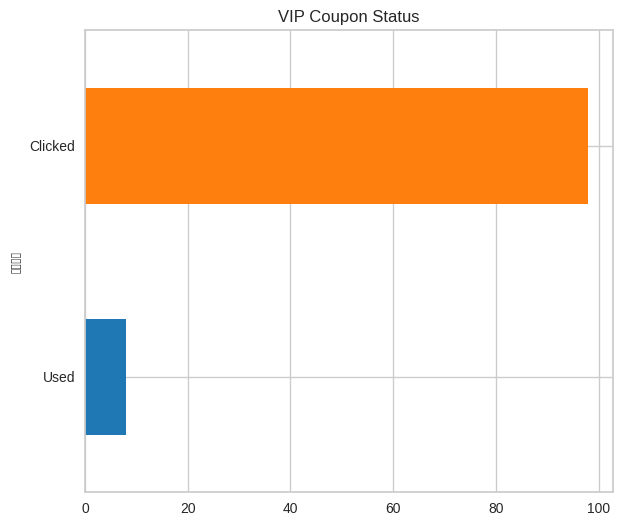

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54256 (\N{HANGUL SYLLABLE PON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


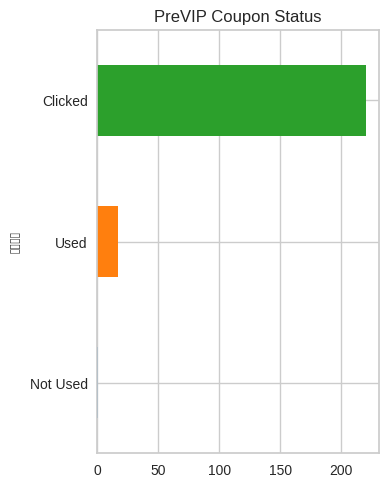

In [162]:
plt.figure(figsize=(15, 6))
colors1 = ['#1f77b4', '#ff7f0e']
plt.subplot(1, 2, 1)
df_vip.groupby('쿠폰상태').count().sort_values('고객ID').iloc[:,1].plot(kind='barh', color=colors1);
plt.title('VIP Coupon Status')
plt.show()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
plt.subplot(1, 2, 2)
df_previp.groupby('쿠폰상태').count().sort_values('고객ID').iloc[:,1].plot(kind='barh', color=colors);
plt.title('PreVIP Coupon Status')
plt.show()

- VIP와 잠재적 VIP 모두 쿠폰을 클릭했지만, 구매까지 이어지지 않는다는 것을 확인함.
- 쿠폰 사용을 촉진시키기 위해 두 그룹 모두 실질적인 쿠폰 발급이 필요하다고 판단함.

- 따라서 VIP와 잠재적 VIP에게 판매 빈도가 높은 제품 카테고리를 확인함.

#### 제품 카테고리별 구매 비율 확인

<ipython-input-163-ff75e4f15336>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='비율', y='제품카테고리', data=grade_data, palette='viridis')


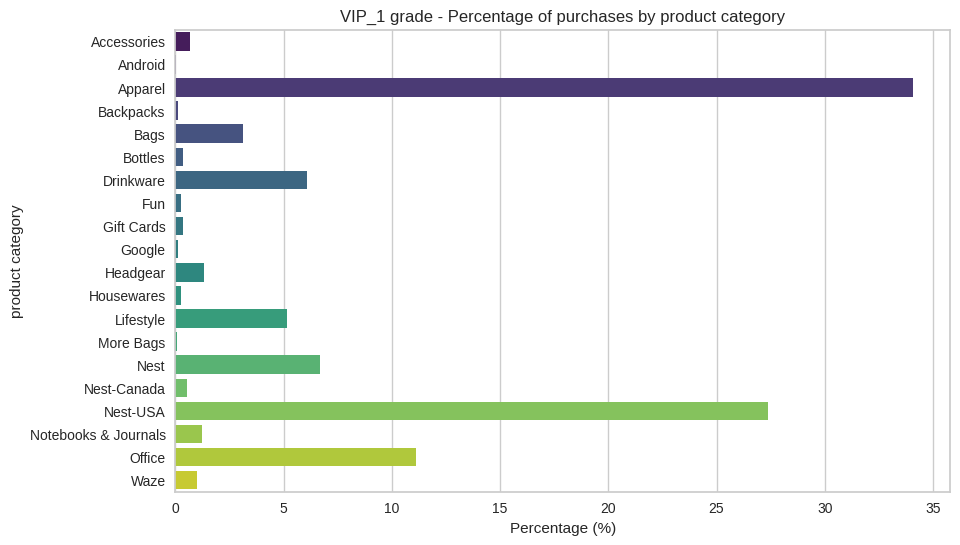

<ipython-input-163-ff75e4f15336>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='비율', y='제품카테고리', data=grade_data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53448 (\N{HANGUL SYLLABLE TAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from 

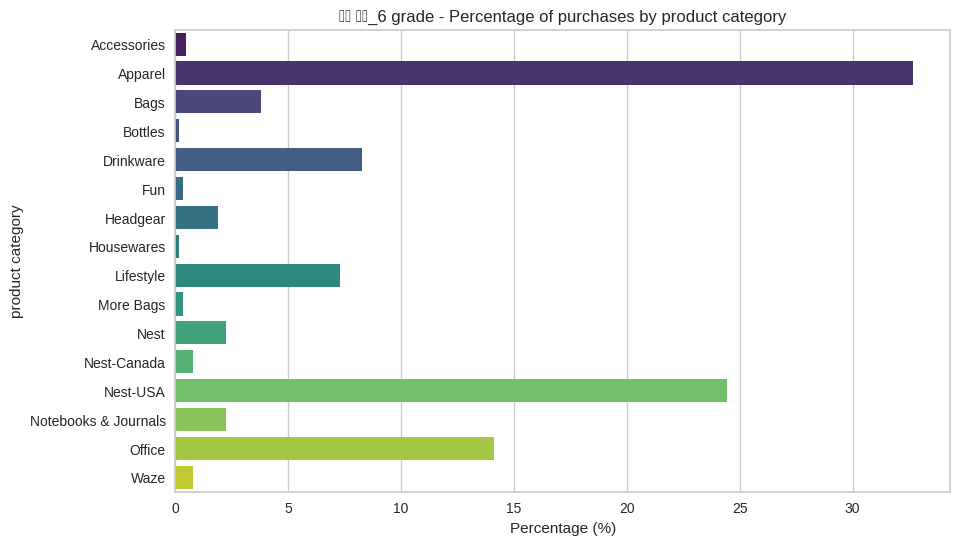

<ipython-input-163-ff75e4f15336>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='비율', y='제품카테고리', data=grade_data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51104 (\N{HANGUL SYLLABLE JAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing fro

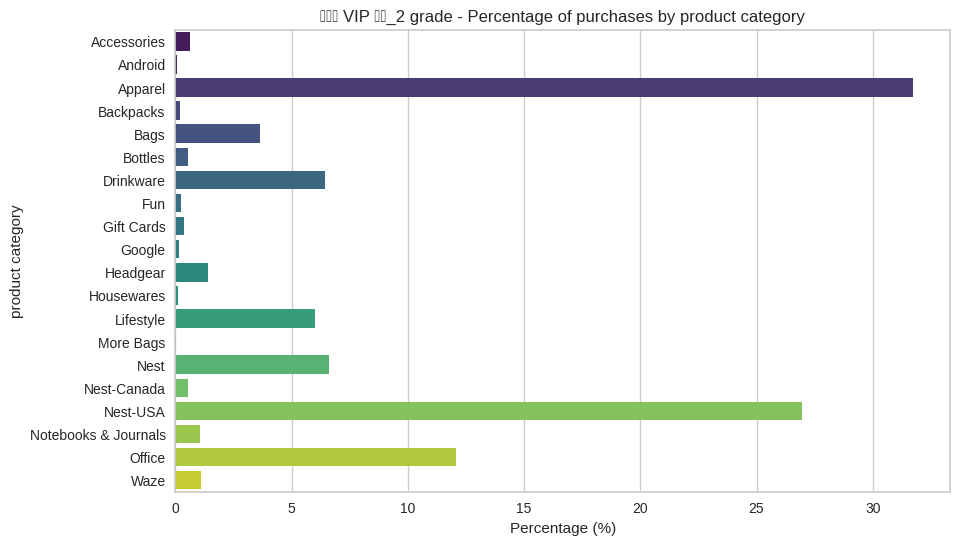

<ipython-input-163-ff75e4f15336>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='비율', y='제품카테고리', data=grade_data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51104 (\N{HANGUL SYLLABLE JAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from

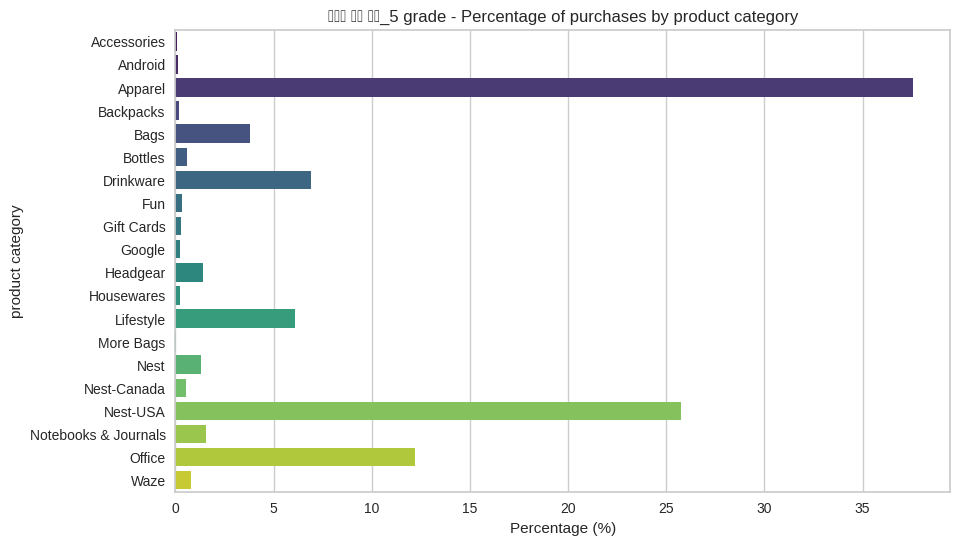

<ipython-input-163-ff75e4f15336>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='비율', y='제품카테고리', data=grade_data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51104 (\N{HANGUL SYLLABLE JAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing f

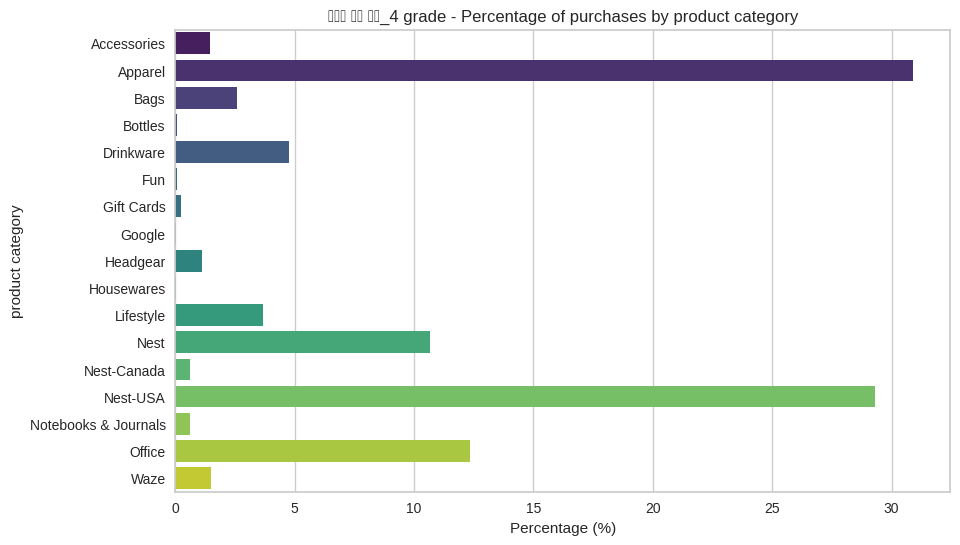

<ipython-input-163-ff75e4f15336>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='비율', y='제품카테고리', data=grade_data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing 

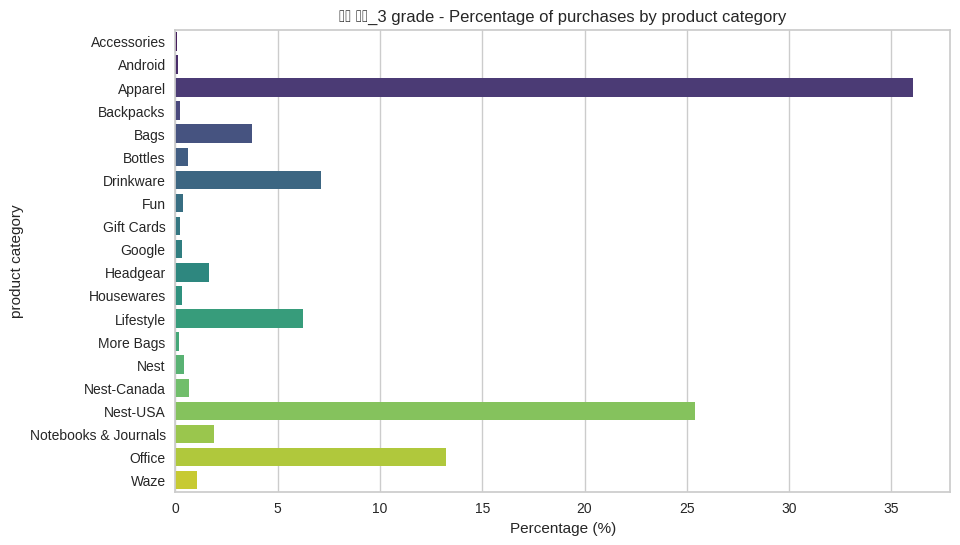

In [163]:
combined_data = pd.merge(df_onlinesales_raw, ch_df_customer_rfm[['고객ID', '고객 세그먼테이션']], on='고객ID', how='inner')

category_ratio_by_grade = combined_data.groupby(['고객 세그먼테이션', '제품카테고리']).size()
category_ratio_by_grade = category_ratio_by_grade / category_ratio_by_grade.groupby(level=0).sum() * 100
category_ratio_by_grade = category_ratio_by_grade.reset_index(name='비율')
grades = category_ratio_by_grade['고객 세그먼테이션'].unique()

for grade in grades:
    plt.figure(figsize=(10, 6))
    grade_data = category_ratio_by_grade[category_ratio_by_grade['고객 세그먼테이션'] == grade]
    sns.barplot(x='비율', y='제품카테고리', data=grade_data, palette='viridis')
    plt.title(f'{grade} grade - Percentage of purchases by product category')
    plt.xlabel('Percentage (%)')
    plt.ylabel('product category')
    plt.show()

- VIP와 잠재적 VIP 모두 Apparel(어패럴)과 Nest-USA(네스트유에스에이)의 구매 비율이 다른 카테고리에 비해 3배 이상 큰 것을 확인함.
- 따라서 VIP 와 잠재점 VIP 고객에게 Apparel(어패럴)과 Nest-USA(네스트유에스에이)의 제품 카테고리에 대해서 쿠폰을 발행하는 마케팅 전략을 수립함.